In [18]:
import pandas as pd
import numpy as np

In [19]:
from sklearn.preprocessing import LabelEncoder

# CLUSTERING BY RESIDUE

## Data Transformation

In [20]:
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')

In [21]:
df

index PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                NaN           NaN   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  ...  \
0                NaN           NaN              NaN                NaN  ...   
1                NaN           NaN              NaN                NaN  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                NaN  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                NaN  ...   
360              NaN           NaN              NaN                NaN  ...   
361              NaN           NaN              NaN                NaN  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.67_intenergysum  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0                 NaN            NaN             NaN            NaN   
1                 NaN            NaN             NaN            NaN   
2                 NaN            NaN             NaN            NaN   
3                 NaN            NaN             NaN            NaN   
4                 NaN            NaN             NaN            NaN   
..                ...            ...             ...            ...   
359               NaN            NaN             NaN            NaN   
360               NaN            NaN             NaN            NaN   
361               NaN            NaN             NaN            NaN   
362               NaN            NaN             NaN            NaN   
363               NaN            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3              NaN              NaN  
4              NaN              NaN  
..             ...              ...  
359            NaN              NaN  
360            NaN              NaN  
361            NaN              NaN

In [22]:
# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty list for  residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

In [23]:
# get list of PDBID values, states, functions
PDBIDs = list(df['PDBID'])
states = list(df['State'])
functions = list(df['Function'])
#PDBIDs

In [24]:
# generate column names for new dataframe
colnames = []

for PDBID in PDBIDs:
    colnames.append(PDBID + '_state') # new 5/17
    colnames.append(PDBID + '_function') # new 5/17
    colnames.append(PDBID + '_intenergysum')
    colnames.append(PDBID + '_inttype1')
    colnames.append(PDBID + '_intenergy1')
    colnames.append(PDBID + '_inttype2')
    colnames.append(PDBID + '_intenergy2')

In [25]:
colnames

['7EW2_state',
 '7EW2_function',
 '7EW2_intenergysum',
 '7EW2_inttype1',
 '7EW2_intenergy1',
 '7EW2_inttype2',
 '7EW2_intenergy2',
 '7EW3_state',
 '7EW3_function',
 '7EW3_intenergysum',
 '7EW3_inttype1',
 '7EW3_intenergy1',
 '7EW3_inttype2',
 '7EW3_intenergy2',
 '7EW4_state',
 '7EW4_function',
 '7EW4_intenergysum',
 '7EW4_inttype1',
 '7EW4_intenergy1',
 '7EW4_inttype2',
 '7EW4_intenergy2',
 '7EW1_state',
 '7EW1_function',
 '7EW1_intenergysum',
 '7EW1_inttype1',
 '7EW1_intenergy1',
 '7EW1_inttype2',
 '7EW1_intenergy2',
 '7LD4_state',
 '7LD4_function',
 '7LD4_intenergysum',
 '7LD4_inttype1',
 '7LD4_intenergy1',
 '7LD4_inttype2',
 '7LD4_intenergy2',
 '7LD3_state',
 '7LD3_function',
 '7LD3_intenergysum',
 '7LD3_inttype1',
 '7LD3_intenergy1',
 '7LD3_inttype2',
 '7LD3_intenergy2',
 '7RM5_state',
 '7RM5_function',
 '7RM5_intenergysum',
 '7RM5_inttype1',
 '7RM5_intenergy1',
 '7RM5_inttype2',
 '7RM5_intenergy2',
 '7M8W_state',
 '7M8W_function',
 '7M8W_intenergysum',
 '7M8W_inttype1',
 '7M8W_int

In [26]:
# create empty dataframe to fill with values from df
ml_df = pd.DataFrame()
ml_df['residue'] = resnums
temp_dict = {}

for colname in colnames:
    temp_dict[colname] = ['NA'] * len(resnums)

ml_df = pd.concat((ml_df, pd.DataFrame(temp_dict)), axis = 1)

In [27]:
ml_df = ml_df.copy()
import pickle
ml_df.to_pickle('pickles/ml_df_empty_refresh_clipped_all_predictors.pkl')

### Read Data

In [28]:
ml_df = pd.read_pickle('pickles/ml_df_empty_refresh_clipped_all_predictors.pkl')
display(ml_df)

residue 7EW2_state 7EW2_function 7EW2_intenergysum 7EW2_inttype1  \
0      1.21         NA            NA                NA            NA   
1      1.22         NA            NA                NA            NA   
2      1.23         NA            NA                NA            NA   
3      1.24         NA            NA                NA            NA   
4      1.25         NA            NA                NA            NA   
..      ...        ...           ...               ...           ...   
327    7.64         NA            NA                NA            NA   
328    7.65         NA            NA                NA            NA   
329    7.66         NA            NA                NA            NA   
330    7.67         NA            NA                NA            NA   
331    7.68         NA            NA                NA            NA   

    7EW2_intenergy1 7EW2_inttype2 7EW2_intenergy2 7EW3_state 7EW3_function  \
0                NA            NA              NA         NA            NA   
1                NA            NA              NA         NA            NA   
2                NA            NA              NA         NA            NA   
3                NA            NA              NA         NA            NA   
4                NA            NA              NA         NA            NA   
..              ...           ...             ...        ...           ...   
327              NA            NA              NA         NA            NA   
328              NA            NA              NA         NA            NA   
329              NA            NA              NA         NA            NA   
330              NA            NA              NA         NA            NA   
331              NA            NA              NA         NA            NA   

     ... 6Z10_intenergy1 6Z10_inttype2 6Z10_intenergy2 6RNK_state  \
0    ...              NA            NA              NA         NA   
1    ...              NA            NA              NA         NA   
2    ...              NA            NA              NA         NA   
3    ...              NA            NA              NA         NA   
4    ...              NA            NA              NA         NA   
..   ...             ...           ...             ...        ...   
327  ...              NA            NA              NA         NA   
328  ...              NA            NA              NA         NA   
329  ...              NA            NA              NA         NA   
330  ...              NA            NA              NA         NA   
331  ...              NA            NA              NA         NA   

    6RNK_function 6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0              NA                NA            NA              NA   
1              NA                NA            NA              NA   
2              NA                NA            NA              NA   
3              NA                NA            NA              NA   
4              NA                NA            NA              NA   
..            ...               ...           ...             ...   
327            NA                NA            NA              NA   
328            NA                NA            NA              NA   
329            NA                NA            NA              NA   
330            NA                NA            NA              NA   
331            NA                NA            NA              NA   

    6RNK_inttype2 6RNK_intenergy2  
0              NA              NA  
1              NA              NA  
2              NA              NA  
3              NA              NA  
4              NA              NA  
..            ...             ...  
327            NA              NA  
328            NA              NA  
329            NA              NA  
330            NA              NA  
331            NA              NA  

[332 rows x 2549 columns]

In [29]:
for df_row in range(len(df)): # row represents df rows
    # get state and ligand function from the row, assign to separate variables
    state = df.loc[df_row, :].values.tolist()[2]
    function = df.loc[df_row, :].values.tolist()[3]
    
    # get state and function columns for each row
    
    # convert row to a flattened list, dropping the first 4 columns
    row_values = df.loc[df_row, :].values.tolist()[4:]
    # print(row_values, '\n')
    
    row_idx = 0 # row index
    col_idx = (df_row * 7) + 3 # start at col 1 for 1st entry, col 8 for 2nd entry, etc.
    col_end_idx = (df_row * 7) + 7
    
    for value in row_values:
        if col_idx > col_end_idx:
            row_idx += 1 # start on next row in ml_df
            col_idx = (df_row * 7) + 3 # reset column numbering
        ml_df.at[row_idx, ml_df.columns[col_idx]] = value # write new value to column col_idx of next row
        col_idx += 1

# fill in state/function columns for each PDBID
for PDBid in PDBIDs:
    state_col = PDBid + '_state'
    function_col = PDBid + '_function'
    
    ml_df.loc[:, state_col] = states[PDBIDs.index(PDBid)]
    ml_df.loc[:, function_col] = functions[PDBIDs.index(PDBid)]

In [30]:
ml_df

residue 7EW2_state 7EW2_function 7EW2_intenergysum 7EW2_inttype1  \
0      1.21     Active       Agonist               NaN           NaN   
1      1.22     Active       Agonist               NaN           NaN   
2      1.23     Active       Agonist               NaN           NaN   
3      1.24     Active       Agonist               NaN           NaN   
4      1.25     Active       Agonist               NaN           NaN   
..      ...        ...           ...               ...           ...   
327    7.64     Active       Agonist               NaN           NaN   
328    7.65     Active       Agonist               NaN           NaN   
329    7.66     Active       Agonist               NaN           NaN   
330    7.67     Active       Agonist               NaN           NaN   
331    7.68     Active       Agonist               NaN           NaN   

    7EW2_intenergy1 7EW2_inttype2 7EW2_intenergy2 7EW3_state 7EW3_function  \
0               NaN           NaN             NaN     Active       Agonist   
1               NaN           NaN             NaN     Active       Agonist   
2               NaN           NaN             NaN     Active       Agonist   
3               NaN           NaN             NaN     Active       Agonist   
4               NaN           NaN             NaN     Active       Agonist   
..              ...           ...             ...        ...           ...   
327             NaN           NaN             NaN     Active       Agonist   
328             NaN           NaN             NaN     Active       Agonist   
329             NaN           NaN             NaN     Active       Agonist   
330             NaN           NaN             NaN     Active       Agonist   
331             NaN           NaN             NaN     Active       Agonist   

     ... 6Z10_intenergy1 6Z10_inttype2 6Z10_intenergy2    6RNK_state  \
0    ...             0.0          None             0.0  Intermediate   
1    ...             0.0          None             0.0  Intermediate   
2    ...             0.0          None             0.0  Intermediate   
3    ...             0.0          None             0.0  Intermediate   
4    ...             0.0          None             0.0  Intermediate   
..   ...             ...           ...             ...           ...   
327  ...             NaN           NaN             NaN  Intermediate   
328  ...             NaN           NaN             NaN  Intermediate   
329  ...             NaN           NaN             NaN  Intermediate   
330  ...             NaN           NaN             NaN  Intermediate   
331  ...             NaN           NaN             NaN  Intermediate   

    6RNK_function 6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0      Antagonist               0.0          None             0.0   
1      Antagonist               0.0          None             0.0   
2      Antagonist               0.0          None             0.0   
3      Antagonist               0.0          None             0.0   
4      Antagonist               0.0          None             0.0   
..            ...               ...           ...             ...   
327    Antagonist               NaN           NaN             NaN   
328    Antagonist               NaN           NaN             NaN   
329    Antagonist               NaN           NaN             NaN   
330    Antagonist               NaN           NaN             NaN   
331    Antagonist               NaN           NaN             NaN   

    6RNK_inttype2 6RNK_intenergy2  
0            None             0.0  
1            None             0.0  
2            None             0.0  
3            None             0.0  
4            None             0.0  
..            ...             ...  
327           NaN             NaN  
328           NaN             NaN  
329           NaN             NaN  
330           NaN             NaN  
331           NaN             NaN  

[332 rows x 2549 columns]

In [31]:
# drop rows for residues not in the list of filtered residues obtained in NaN_zero_interaction_analysis.ipynb
with open('pickles/filtered_residue_list.pkl', "rb") as f:
    filtered_residues = pickle.load(f)

rows_to_drop = []

for i in range(len(ml_df)):
    residue = ml_df.iloc[i, :]['residue']
    if ml_df.iloc[i, :]['residue'] not in filtered_residues:
        rows_to_drop.append(i)

ml_df.drop(index = rows_to_drop, inplace = True)
ml_df.reset_index(inplace = True)
ml_df.drop(['index'], axis = 1, inplace = True)

display(ml_df)

residue 7EW2_state 7EW2_function 7EW2_intenergysum 7EW2_inttype1  \
0      1.32     Active       Agonist               NaN           NaN   
1      1.33     Active       Agonist               0.0          None   
2      1.34     Active       Agonist               0.0          None   
3      1.35     Active       Agonist               0.0          None   
4      1.36     Active       Agonist               0.0          None   
..      ...        ...           ...               ...           ...   
194    7.50     Active       Agonist                 0          None   
195    7.51     Active       Agonist                 0          None   
196    7.52     Active       Agonist                 0          None   
197    7.53     Active       Agonist               0.0          None   
198    7.54     Active       Agonist               0.0          None   

    7EW2_intenergy1 7EW2_inttype2 7EW2_intenergy2 7EW3_state 7EW3_function  \
0               NaN           NaN             NaN     Active       Agonist   
1               0.0          None             0.0     Active       Agonist   
2               0.0          None             0.0     Active       Agonist   
3               0.0          None             0.0     Active       Agonist   
4               0.0          None             0.0     Active       Agonist   
..              ...           ...             ...        ...           ...   
194               0          None               0     Active       Agonist   
195               0          None               0     Active       Agonist   
196               0          None               0     Active       Agonist   
197             0.0          None             0.0     Active       Agonist   
198             0.0          None             0.0     Active       Agonist   

     ... 6Z10_intenergy1 6Z10_inttype2 6Z10_intenergy2    6RNK_state  \
0    ...             0.0          None             0.0  Intermediate   
1    ...             0.0          None             0.0  Intermediate   
2    ...             0.0          None             0.0  Intermediate   
3    ...             0.0      Distance             0.0  Intermediate   
4    ...             0.0          None             0.0  Intermediate   
..   ...             ...           ...             ...           ...   
194  ...               0          None               0  Intermediate   
195  ...               0          None               0  Intermediate   
196  ...               0          None               0  Intermediate   
197  ...             0.0          None             0.0  Intermediate   
198  ...             0.0          None             0.0  Intermediate   

    6RNK_function 6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0      Antagonist               0.0          None             0.0   
1      Antagonist               0.0          None             0.0   
2      Antagonist               0.0          None             0.0   
3      Antagonist               0.0      Distance             0.0   
4      Antagonist               0.0          None             0.0   
..            ...               ...           ...             ...   
194    Antagonist                 0          None               0   
195    Antagonist                 0          None               0   
196    Antagonist                 0          None               0   
197    Antagonist               0.0          None             0.0   
198    Antagonist               0.0          None             0.0   

    6RNK_inttype2 6RNK_intenergy2  
0            None             0.0  
1            None             0.0  
2            None             0.0  
3            None             0.0  
4            None             0.0  
..            ...             ...  
194          None               0  
195          None               0  
196          None               0  
197          None             0.0  
198          None             0.0  

[199 rows x 2549 columns]

In [32]:
# drop state/function columns
for col in ml_df.columns[1:]:
    if 'state' in col or 'function' in col:
        ml_df.drop([col], axis = 1, inplace = True)

In [33]:
display(ml_df)

residue 7EW2_intenergysum 7EW2_inttype1 7EW2_intenergy1 7EW2_inttype2  \
0      1.32               NaN           NaN             NaN           NaN   
1      1.33               0.0          None             0.0          None   
2      1.34               0.0          None             0.0          None   
3      1.35               0.0          None             0.0          None   
4      1.36               0.0          None             0.0          None   
..      ...               ...           ...             ...           ...   
194    7.50                 0          None               0          None   
195    7.51                 0          None               0          None   
196    7.52                 0          None               0          None   
197    7.53               0.0          None             0.0          None   
198    7.54               0.0          None             0.0          None   

    7EW2_intenergy2 7EW3_intenergysum 7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN           NaN             NaN   
1               0.0               NaN           NaN             NaN   
2               0.0               0.0          None             0.0   
3               0.0               0.0          None             0.0   
4               0.0               0.0          None             0.0   
..              ...               ...           ...             ...   
194               0                 0          None               0   
195               0                 0          None               0   
196               0                 0          None               0   
197             0.0               NaN           NaN             NaN   
198             0.0               NaN           NaN             NaN   

    7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1 6Z10_intenergy1  \
0             NaN  ...               0.0          None             0.0   
1             NaN  ...               0.0          None             0.0   
2            None  ...               0.0          None             0.0   
3            None  ...               0.0      Distance             0.0   
4            None  ...               0.0          None             0.0   
..            ...  ...               ...           ...             ...   
194          None  ...                 0          None               0   
195          None  ...                 0          None               0   
196          None  ...                 0          None               0   
197           NaN  ...               0.0          None             0.0   
198           NaN  ...               0.0          None             0.0   

    6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0            None             0.0               0.0          None   
1            None             0.0               0.0          None   
2            None             0.0               0.0          None   
3        Distance             0.0               0.0      Distance   
4            None             0.0               0.0          None   
..            ...             ...               ...           ...   
194          None               0                 0          None   
195          None               0                 0          None   
196          None               0                 0          None   
197          None             0.0               0.0          None   
198          None             0.0               0.0          None   

    6RNK_intenergy1 6RNK_inttype2 6RNK_intenergy2  
0               0.0          None             0.0  
1               0.0          None             0.0  
2               0.0          None             0.0  
3               0.0          None             0.0  
4               0.0          None             0.0  
..              ...           ...             ...  
194               0          None               0  
195               0          None               0  
196               0          None       

In [34]:
# get unique interaction types
cols = [col for col in df.columns if 'type' in col]
int_types = []

for col in cols:
    for int_type in list(df[col].unique()):
        #print(type(int_type))
        if int_type not in int_types and int_type != 'None' and isinstance(int_type, str):
            int_types.append(int_type)
            
print(int_types)

['Hbond', 'Arene', 'Distance', 'Ionic', 'Covalent']


In [35]:
# pickle ml_df that is filled with data but not scaled or imputed
ml_df.to_pickle('pickles/ml_df_filled_refresh_clipped_all_predictors.pkl')

In [36]:
# encode interaction types as integers (only necessary if inttype1/2 columns are in the dataframe)

if any("type" in s for s in list(ml_df.columns)):
    
    # create instance of labelencoder
    labelencoder = LabelEncoder()

    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'type' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])


    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'state' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])

    # encode functions as integers
    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'function' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])

In [37]:
display(ml_df)

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.32               NaN              5             NaN              4   
1      1.33               0.0              4             0.0              3   
2      1.34               0.0              4             0.0              3   
3      1.35               0.0              4             0.0              3   
4      1.36               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
194    7.50                 0              4               0              3   
195    7.51                 0              4               0              3   
196    7.52                 0              4               0              3   
197    7.53               0.0              4             0.0              3   
198    7.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               0.0               NaN              4             NaN   
2               0.0               0.0              3             0.0   
3               0.0               0.0              3             0.0   
4               0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
194               0                 0              3               0   
195               0                 0              3               0   
196               0                 0              3               0   
197             0.0               NaN              4             NaN   
198             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1  6Z10_intenergy1  \
0                3  ...               0.0             3              0.0   
1                3  ...               0.0             3              0.0   
2                2  ...               0.0             3              0.0   
3                2  ...               0.0             1              0.0   
4                2  ...               0.0             3              0.0   
..             ...  ...               ...           ...              ...   
194              2  ...                 0             3                0   
195              2  ...                 0             3                0   
196              2  ...                 0             3                0   
197              3  ...               0.0             3              0.0   
198              3  ...               0.0             3              0.0   

    6Z10_inttype2  6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0               4              0.0               0.0             3   
1               4              0.0               0.0             3   
2               4              0.0               0.0             3   
3               1              0.0               0.0             1   
4               4              0.0               0.0             3   
..            ...              ...               ...           ...   
194             4                0                 0             3   
195             4                0                 0             3   
196             4                0                 0             3   
197             4              0.0               0.0             3   
198             4              0.0               0.0             3   

     6RNK_intenergy1 6RNK_inttype2  6RNK_intenergy2  
0                0.0             4              0.0  
1                0.0             4              0.0  
2                0.0             4              0.0  
3                0.0             4              0.0  
4                0.0             4              0.0  
..               ...           ...              ...  
194                0             4                0  
195 

In [38]:
ml_df.to_csv('ml_df_test_refresh_clipped_all_predictors.csv')

---
# Machine Learning

In [39]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [40]:
# X has features, y has residues
X = ml_df.drop(['residue'], axis = 1)
y = ml_df['residue']
display(X)
ml_df_colnames = list(ml_df.columns)

7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0                 NaN              5             NaN              4   
1                 0.0              4             0.0              3   
2                 0.0              4             0.0              3   
3                 0.0              4             0.0              3   
4                 0.0              4             0.0              3   
..                ...            ...             ...            ...   
194                 0              4               0              3   
195                 0              4               0              3   
196                 0              4               0              3   
197               0.0              4             0.0              3   
198               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               0.0               NaN              4             NaN   
2               0.0               0.0              3             0.0   
3               0.0               0.0              3             0.0   
4               0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
194               0                 0              3               0   
195               0                 0              3               0   
196               0                 0              3               0   
197             0.0               NaN              4             NaN   
198             0.0               NaN              4             NaN   

     7EW3_inttype2 7EW3_intenergy2  ... 6Z10_intenergysum  6Z10_inttype1  \
0                3             NaN  ...               0.0              3   
1                3             NaN  ...               0.0              3   
2                2             0.0  ...               0.0              3   
3                2             0.0  ...               0.0              1   
4                2             0.0  ...               0.0              3   
..             ...             ...  ...               ...            ...   
194              2               0  ...                 0              3   
195              2               0  ...                 0              3   
196              2               0  ...                 0              3   
197              3             NaN  ...               0.0              3   
198              3             NaN  ...               0.0              3   

    6Z10_intenergy1  6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum  \
0               0.0              4             0.0               0.0   
1               0.0              4             0.0               0.0   
2               0.0              4             0.0               0.0   
3               0.0              1             0.0               0.0   
4               0.0              4             0.0               0.0   
..              ...            ...             ...               ...   
194               0              4               0                 0   
195               0              4               0                 0   
196               0              4               0                 0   
197             0.0              4             0.0               0.0   
198             0.0              4             0.0               0.0   

     6RNK_inttype1 6RNK_intenergy1  6RNK_inttype2 6RNK_intenergy2  
0                3             0.0              4             0.0  
1                3             0.0              4             0.0  
2                3             0.0              4             0.0  
3                1             0.0              4             0.0  
4                3             0.0              4             0.0  
..             ...             ...            ...             ...  
194              3              

In [41]:
# minimum energy
min(list(X.min()))

-39.702366

In [42]:
# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

# rename X columns
X.set_axis(ml_df_colnames[1:], axis = 1, inplace = True)

# display scaled values
display(X)

7EW2_intenergysum  7EW2_inttype1  7EW2_intenergy1  7EW2_inttype2  \
0             0.104653      -3.051206         0.129624      -1.800393   
1             0.310314      -4.814542         1.261948      -4.033700   
2             0.310314      -4.814542         1.261948      -4.033700   
3             0.310314      -4.814542         1.261948      -4.033700   
4             0.310314      -4.814542         1.261948      -4.033700   
..                 ...            ...              ...            ...   
194           0.310314      -4.814542         1.261948      -4.033700   
195           0.310314      -4.814542         1.261948      -4.033700   
196           0.310314      -4.814542         1.261948      -4.033700   
197           0.310314      -4.814542         1.261948      -4.033700   
198           0.310314      -4.814542         1.261948      -4.033700   

     7EW2_intenergy2  7EW3_intenergysum  7EW3_inttype1  7EW3_intenergy1  \
0           0.090219           0.083300      -1.667386         0.098490   
1           0.302101           0.083300      -1.667386         0.098490   
2           0.302101           0.219875      -3.173586         1.679841   
3           0.302101           0.219875      -3.173586         1.679841   
4           0.302101           0.219875      -3.173586         1.679841   
..               ...                ...            ...              ...   
194         0.302101           0.219875      -3.173586         1.679841   
195         0.302101           0.219875      -3.173586         1.679841   
196         0.302101           0.219875      -3.173586         1.679841   
197         0.302101           0.083300      -1.667386         0.098490   
198         0.302101           0.083300      -1.667386         0.098490   

     7EW3_inttype2  7EW3_intenergy2  ...  6Z10_intenergysum  6Z10_inttype1  \
0         0.195198         0.074442  ...           0.270372      -5.835835   
1         0.195198         0.074442  ...           0.270372      -5.835835   
2        -3.313662         0.220979  ...           0.270372      -5.835835   
3        -3.313662         0.220979  ...           0.270372     -15.314294   
4        -3.313662         0.220979  ...           0.270372      -5.835835   
..             ...              ...  ...                ...            ...   
194      -3.313662         0.220979  ...           0.270372      -5.835835   
195      -3.313662         0.220979  ...           0.270372      -5.835835   
196      -3.313662         0.220979  ...           0.270372      -5.835835   
197       0.195198         0.074442  ...           0.270372      -5.835835   
198       0.195198         0.074442  ...           0.270372      -5.835835   

     6Z10_intenergy1  6Z10_inttype2  6Z10_intenergy2  6RNK_intenergysum  \
0           0.388523      -4.740020         0.369639           0.248343   
1           0.388523      -4.740020         0.369639           0.248343   
2           0.388523      -4.740020         0.369639           0.248343   
3           0.388523     -10.000514         0.369639           0.248343   
4           0.388523      -4.740020         0.369639           0.248343   
..               ...            ...              ...                ...   
194         0.388523      -4.740020         0.369639           0.248343   
195         0.388523      -4.740020         0.369639           0.248343   
196         0.388523      -4.740020         0.369639           0.248343   
197         0.388523      -4.740020         0.369639           0.248343   
198         0.388523      -4.740020         0.369639           0.248343   

     6RNK_inttype1  6RNK_intenergy1  6RNK_inttype2  6RNK_intenergy2  
0        -5.712331           0.3922      -5.259072         2.851064  
1        -5.712331           0.3922      -5.259072         2.851064  
2        -5.712331           0.3922      -5.259072         2.851064  
3       -14.759852           0.3922      -5.259072         2.851064  
4        -5.712331           0.3922    

In [43]:
X.to_pickle('pickles/X_imputed_scaled_refresh_clipped_all_predictors.pkl')
y.to_pickle('pickles/y_residues_refresh_clipped_all_predictors.pkl')

### Mean Shift Clustering

In [44]:
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 2


In [45]:
ml_df['cluster_labels'] = labels

uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.32               NaN              5             NaN              4   
1      1.33               0.0              4             0.0              3   
2      1.34               0.0              4             0.0              3   
3      1.35               0.0              4             0.0              3   
4      1.36               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
194    7.50                 0              4               0              3   
195    7.51                 0              4               0              3   
196    7.52                 0              4               0              3   
197    7.53               0.0              4             0.0              3   
198    7.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               0.0               NaN              4             NaN   
2               0.0               0.0              3             0.0   
3               0.0               0.0              3             0.0   
4               0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
194               0                 0              3               0   
195               0                 0              3               0   
196               0                 0              3               0   
197             0.0               NaN              4             NaN   
198             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                3  ...             3             0.0              4   
1                3  ...             3             0.0              4   
2                2  ...             3             0.0              4   
3                2  ...             1             0.0              1   
4                2  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
194              2  ...             3               0              4   
195              2  ...             3               0              4   
196              2  ...             3               0              4   
197              3  ...             3             0.0              4   
198              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             1             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
194               0                  0             3               0   
195               0                  0             3               0   
196               0                  0             3               0   
197             0.0                0.0             3             0.0   
198             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               0  
1                4             0.0               0  
2                4             0.0               0  
3                4             0.0               0  
4                4             0.0               0  
..             ...             ...             ...  
194              4               0               0  
195              4               0  


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
179    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
179             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
179              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
179             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
179              4             0.0               1  

[1 rows x 1822 columns]

### Mean Shift TSNE

In [46]:
from sklearn.manifold import TSNE

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotX = X.copy()

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# TSNE import
from sklearn.manifold import TSNE

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

In [47]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### DBSCAN Clustering

In [48]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples = 2).fit(X)

labels = clustering.labels_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 3


In [49]:
ml_df['cluster_labels'] = labels

uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for c_label in uniq_labels:
    print('\nCluster', c_label)
    display(ml_df.loc[ml_df['cluster_labels'] == c_label])


Cluster -1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.32               NaN              5             NaN              4   
1      1.33               0.0              4             0.0              3   
2      1.34               0.0              4             0.0              3   
3      1.35               0.0              4             0.0              3   
4      1.36               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
189    7.45               0.0              4             0.0              3   
190    7.46               0.0              4             0.0              3   
191    7.47               0.0              4             0.0              3   
197    7.53               0.0              4             0.0              3   
198    7.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               0.0               NaN              4             NaN   
2               0.0               0.0              3             0.0   
3               0.0               0.0              3             0.0   
4               0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
189               0               0.0              3             0.0   
190             0.0               0.0              3             0.0   
191               0               0.0              3             0.0   
197             0.0               NaN              4             NaN   
198             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                3  ...             3             0.0              4   
1                3  ...             3             0.0              4   
2                2  ...             3             0.0              4   
3                2  ...             1             0.0              1   
4                2  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
189              2  ...             3             0.0              4   
190              2  ...             3             0.0              4   
191              2  ...             3             0.0              4   
197              3  ...             3             0.0              4   
198              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             1             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
189               0                0.0             3             0.0   
190             0.0                0.0             3             0.0   
191               0                0.0             3             0.0   
197             0.0                0.0             3             0.0   
198             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0              -1  
1                4             0.0              -1  
2                4             0.0              -1  
3                4             0.0              -1  
4                4             0.0              -1  
..             ...             ...             ...  
189              4               0              -1  
190              4             0.0  


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
8    1.40               0.0              4             0.0              3   
9    1.41               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
8             0.0               0.0              3             0.0   
9             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
8              2  ...             3             0.0              4   
9              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
8             0.0                0.0             3             0.0   
9             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
8              4             0.0               0  
9              4             0.0               0  

[2 rows x 1822 columns]


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
12     1.44                 0              4               0              3   
13     1.45                 0              4               0              3   
14     1.46                 0              4               0              3   
15     1.47                 0              4               0              3   
16     1.48                 0              4               0              3   
17     1.49                 0              4               0              3   
18     1.50                 0              4               0              3   
19     1.51                 0              4               0              3   
20     1.52                 0              4               0              3   
21     1.53                 0              4               0              3   
22     1.54                 0              4               0              3   
33     2.43                 0              4               0              3   
36     2.46                 0              4               0              3   
37     2.47                 0              4               0              3   
41     2.51                 0              4               0              3   
42     2.52                 0              4               0              3   
77     3.42                 0              4               0              3   
78     3.43                 0              4               0              3   
81     3.46                 0              4               0              3   
82     3.47                 0              4               0              3   
84     3.49                 0              4               0              3   
85     3.50                 0              4               0              3   
86     3.51                 0              4               0              3   
87     3.52                 0              4               0              3   
96     4.44                 0              4               0              3   
131    5.52                 0              4               0              3   
134    5.55                 0              4               0              3   
135    5.56                 0              4               0              3   
136    5.57                 0              4               0              3   
137    5.58                 0              4               0              3   
138    5.59                 0              4               0              3   
139    5.60                 0              4               0              3   
140    5.61                 0              4               0              3   
141    5.62                 0              4               0              3   
142    5.63                 0              4               0              3   
151    6.35                 0              4               0              3   
152    6.36                 0              4               0              3   
153    6.37                 0              4               0              3   
154    6.38                 0              4               0              3   
155    6.39                 0              4               0              3   
156    6.40                 0              4               0              3   
157    6.41                 0              4               0              3   
158    6.42                 0              4               0              3   
159    6.43                 0              4               0              3   
162    6.46                 0              4               0              3   
192    7.48                 0              4               0              3   
193    7.49                 0              4               0              3   
194    7.50                 0              4               0              3   
195    7.51                 0              4               0              3   
196    7.52                 0              4          

### DBSCAN TSNE

In [50]:
#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

### OPTICS Clustering

In [51]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=2).fit(X)

labels = clustering.labels_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 14


C:\Users\Greg\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:807: RuntimeWarning:

divide by zero encountered in true_divide



In [52]:
ml_df['cluster_labels'] = labels

uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster -1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.32               NaN              5             NaN              4   
1      1.33               0.0              4             0.0              3   
2      1.34               0.0              4             0.0              3   
3      1.35               0.0              4             0.0              3   
4      1.36               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
188    7.44                 0              4               0              3   
189    7.45               0.0              4             0.0              3   
190    7.46               0.0              4             0.0              3   
191    7.47               0.0              4             0.0              3   
197    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               0.0               NaN              4             NaN   
2               0.0               0.0              3             0.0   
3               0.0               0.0              3             0.0   
4               0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
188               0                 0              3               0   
189               0               0.0              3             0.0   
190             0.0               0.0              3             0.0   
191               0               0.0              3             0.0   
197             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                3  ...             3             0.0              4   
1                3  ...             3             0.0              4   
2                2  ...             3             0.0              4   
3                2  ...             1             0.0              1   
4                2  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
188              2  ...             3               0              4   
189              2  ...             3             0.0              4   
190              2  ...             3             0.0              4   
191              2  ...             3             0.0              4   
197              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             1             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
188               0                  0             3               0   
189               0                0.0             3             0.0   
190             0.0                0.0             3             0.0   
191               0                0.0             3             0.0   
197             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0              -1  
1                4             0.0              -1  
2                4             0.0              -1  
3                4             0.0              -1  
4                4             0.0              -1  
..             ...             ...             ...  
188              4               0              -1  
189              4               0  


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
8    1.40               0.0              4             0.0              3   
9    1.41               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
8             0.0               0.0              3             0.0   
9             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
8              2  ...             3             0.0              4   
9              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
8             0.0                0.0             3             0.0   
9             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
8              4             0.0               0  
9              4             0.0               0  

[2 rows x 1822 columns]


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
12     1.44                 0              4               0              3   
13     1.45                 0              4               0              3   
14     1.46                 0              4               0              3   
15     1.47                 0              4               0              3   
16     1.48                 0              4               0              3   
17     1.49                 0              4               0              3   
18     1.50                 0              4               0              3   
19     1.51                 0              4               0              3   
20     1.52                 0              4               0              3   
21     1.53                 0              4               0              3   
22     1.54                 0              4               0              3   
33     2.43                 0              4               0              3   
36     2.46                 0              4               0              3   
37     2.47                 0              4               0              3   
41     2.51                 0              4               0              3   
42     2.52                 0              4               0              3   
73     3.38                 0              4               0              3   
77     3.42                 0              4               0              3   
78     3.43                 0              4               0              3   
81     3.46                 0              4               0              3   
82     3.47                 0              4               0              3   
84     3.49                 0              4               0              3   
85     3.50                 0              4               0              3   
86     3.51                 0              4               0              3   
87     3.52                 0              4               0              3   
88     3.53               0.0              4             0.0              3   
96     4.44                 0              4               0              3   
131    5.52                 0              4               0              3   
134    5.55                 0              4               0              3   
135    5.56                 0              4               0              3   
136    5.57                 0              4               0              3   
137    5.58                 0              4               0              3   
138    5.59                 0              4               0              3   
139    5.60                 0              4               0              3   
140    5.61                 0              4               0              3   
141    5.62                 0              4               0              3   
142    5.63                 0              4               0              3   
151    6.35                 0              4               0              3   
152    6.36                 0              4               0              3   
153    6.37                 0              4               0              3   
154    6.38                 0              4               0              3   
155    6.39                 0              4               0              3   
156    6.40                 0              4               0              3   
157    6.41                 0              4               0              3   
158    6.42                 0              4               0              3   
159    6.43                 0              4               0              3   
162    6.46                 0              4               0              3   
192    7.48                 0              4               0              3   
193    7.49                 0              4               0              3   
194    7.50                 0              4          


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
23    1.55               0.0              4             0.0              3   
24    1.56               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
23             0.0               0.0              3             0.0   
24             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
23              2  ...             3             0.0              4   
24              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
23             0.0                0.0             3             0.0   
24             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
23              4             0.0               2  
24              4             0.0               2  

[2 rows x 1822 columns]


Cluster 3


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
130    5.51                 0              4               0              3   
161    6.45               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
130               0                 0              3               0   
161               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
130              2  ...             3               0              4   
161              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
130               0                  0             3               0   
161               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
130              4               0               3  
161              4               0               3  

[2 rows x 1822 columns]


Cluster 4


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
97     4.45               0.0              4             0.0              3   
100    4.48                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
97                0               0.0              3             0.0   
100               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
97               2  ...             3             0.0              4   
100              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
97                0                0.0             3             0.0   
100               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
97               4               0               4  
100              4               0               4  

[2 rows x 1822 columns]


Cluster 5


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
76     3.41               0.0              4             0.0              3   
80     3.45               0.0              4             0.0              3   
83     3.48                 0              4               0              3   
104    4.52               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
76                0               0.0              3             0.0   
80                0               0.0              3             0.0   
83                0                 0              3               0   
104               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
76               2  ...             3             0.0              4   
80               2  ...             3             0.0              4   
83               2  ...             3               0              4   
104              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
76                0                0.0             3             0.0   
80                0                0.0             3             0.0   
83                0                  0             3               0   
104               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
76               4               0               5  
80               4               0               5  
83               4               0               5  
104              4               0               5  

[4 rows x 1822 columns]


Cluster 6


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
148    6.32               0.0              4             0.0              3   
149    6.33               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
148             0.0               0.0              3             0.0   
149             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
148              2  ...             3             0.0              4   
149              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
148             0.0                0.0             3             0.0   
149             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
148              4             0.0               6  
149              4             0.0               6  

[2 rows x 1822 columns]


Cluster 7


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
34     2.44                 0              4               0              3   
95     4.43                 0              4               0              3   
103    4.51                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
34                0                 0              3               0   
95                0                 0              3               0   
103               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
34               2  ...             3               0              4   
95               2  ...             3               0              4   
103              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
34                0                  0             3               0   
95                0                  0             3               0   
103               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
34               4               0               7  
95               4               0               7  
103              4               0               7  

[3 rows x 1822 columns]


Cluster 8


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
57    3.22               0.0              4             0.0              3   
59    3.24               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
57             0.0               0.0              3             0.0   
59             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
57              2  ...             3             0.0              4   
59              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
57             0.0                0.0             3             0.0   
59             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
57              4             0.0               8  
59              4             0.0               8  

[2 rows x 1822 columns]


Cluster 9


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
35    2.45               0.0              4             0.0              3   
99    4.47               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
35               0               0.0              3             0.0   
99               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
35              2  ...             3             0.0              4   
99              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
35               0                0.0             3             0.0   
99               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
35              4               0               9  
99              4               0               9  

[2 rows x 1822 columns]


Cluster 10


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
31    2.41               0.0              4             0.0              3   
38    2.48               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
31             0.0               0.0              3             0.0   
38             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
31              2  ...             3             0.0              4   
38              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
31             0.0                0.0             3             0.0   
38             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
31              4             0.0              10  
38              4             0.0              10  

[2 rows x 1822 columns]


Cluster 11


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
113    4.61               0.0              4             0.0              3   
118    5.39               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
113             0.0               0.0              3             0.0   
118             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
113              2  ...             3             0.0              4   
118              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
113             0.0                0.0             3             0.0   
118             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
113              4             0.0              11  
118              4             0.0              11  

[2 rows x 1822 columns]


Cluster 12


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
25     1.57               0.0              4             0.0              3   
26     1.58               0.0              4             0.0              3   
27     1.59               0.0              4             0.0              3   
144    5.65               0.0              4             0.0              3   
145    5.66               0.0              4             0.0              3   
198    7.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
25              0.0               0.0              3             0.0   
26              0.0               0.0              3             0.0   
27              0.0               0.0              3             0.0   
144             0.0               0.0              3             0.0   
145             0.0               0.0              3             0.0   
198             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
25               2  ...             3             0.0              4   
26               2  ...             3             0.0              4   
27               2  ...             3             0.0              4   
144              2  ...             3             0.0              4   
145              2  ...             3             0.0              4   
198              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
25              0.0                0.0             3             0.0   
26              0.0                0.0             3             0.0   
27              0.0                0.0             3             0.0   
144             0.0                0.0             3             0.0   
145             0.0                0.0             3             0.0   
198             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
25               4             0.0              12  
26               4             0.0              12  
27               4             0.0              12  
144              4             0.0              12  
145              4             0.0              12  
198              4             0.0              12  

[6 rows x 1822 columns]

### OPTICS TSNE

In [53]:
#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

### Scipy Hierarchical Clustering

In [54]:
import scipy.cluster.hierarchy as hcluster

In [55]:
# clustering
thresh = 1
clusters = hcluster.fclusterdata(X, thresh, criterion="distance")

labels = clusters
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 149


In [56]:
ml_df['cluster_labels'] = labels

uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
25    1.57               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
25             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
25              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
25             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
25              4             0.0               1  

[1 rows x 1822 columns]


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
26    1.58               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
26             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
26              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
26             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
26              4             0.0               2  

[1 rows x 1822 columns]


Cluster 3


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
27    1.59               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
27             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
27              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
27             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
27              4             0.0               3  

[1 rows x 1822 columns]


Cluster 4


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
198    7.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
198             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
198              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
198             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
198              4             0.0               4  

[1 rows x 1822 columns]


Cluster 5


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
144    5.65               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
144             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
144              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
144             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
144              4             0.0               5  

[1 rows x 1822 columns]


Cluster 6


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
145    5.66               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
145             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
145              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
145             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
145              4             0.0               6  

[1 rows x 1822 columns]


Cluster 7


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
113    4.61               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
113             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
113              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
113             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
113              4             0.0               7  

[1 rows x 1822 columns]


Cluster 8


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
118    5.39               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
118             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
118              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
118             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
118              4             0.0               8  

[1 rows x 1822 columns]


Cluster 9


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
35    2.45               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
35               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
35              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
35               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
35              4               0               9  

[1 rows x 1822 columns]


Cluster 10


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
99    4.47               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
99               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
99              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
99               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
99              4               0              10  

[1 rows x 1822 columns]


Cluster 11


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
57    3.22               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
57             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
57              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
57             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
57              4             0.0              11  

[1 rows x 1822 columns]


Cluster 12


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
59    3.24               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
59             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
59              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
59             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
59              4             0.0              12  

[1 rows x 1822 columns]


Cluster 13


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
34    2.44                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
34               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
34              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
34               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
34              4               0              13  

[1 rows x 1822 columns]


Cluster 14


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
95    4.43                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
95               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
95              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
95               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
95              4               0              14  

[1 rows x 1822 columns]


Cluster 15


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
103    4.51                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
103               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
103              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
103               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
103              4               0              15  

[1 rows x 1822 columns]


Cluster 16


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
148    6.32               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
148             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
148              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
148             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
148              4             0.0              16  

[1 rows x 1822 columns]


Cluster 17


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
149    6.33               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
149             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
149              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
149             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
149              4             0.0              17  

[1 rows x 1822 columns]


Cluster 18


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
76    3.41               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
76               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
76              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
76               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
76              4               0              18  

[1 rows x 1822 columns]


Cluster 19


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
80    3.45               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
80               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
80              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
80               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
80              4               0              19  

[1 rows x 1822 columns]


Cluster 20


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
104    4.52               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
104               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
104              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
104               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
104              4               0              20  

[1 rows x 1822 columns]


Cluster 21


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
83    3.48                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
83               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
83              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
83               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
83              4               0              21  

[1 rows x 1822 columns]


Cluster 22


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
97    4.45               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
97               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
97              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
97               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
97              4               0              22  

[1 rows x 1822 columns]


Cluster 23


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
100    4.48                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
100               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
100              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
100               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
100              4               0              23  

[1 rows x 1822 columns]


Cluster 24


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
23    1.55               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
23             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
23              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
23             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
23              4             0.0              24  

[1 rows x 1822 columns]


Cluster 25


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
24    1.56               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
24             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
24              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
24             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
24              4             0.0              25  

[1 rows x 1822 columns]


Cluster 26


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
8    1.40               0.0              4             0.0              3   
9    1.41               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
8             0.0               0.0              3             0.0   
9             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
8              2  ...             3             0.0              4   
9              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
8             0.0                0.0             3             0.0   
9             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
8              4             0.0              26  
9              4             0.0              26  

[2 rows x 1822 columns]


Cluster 27


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
12     1.44                 0              4               0              3   
13     1.45                 0              4               0              3   
14     1.46                 0              4               0              3   
15     1.47                 0              4               0              3   
16     1.48                 0              4               0              3   
17     1.49                 0              4               0              3   
18     1.50                 0              4               0              3   
19     1.51                 0              4               0              3   
20     1.52                 0              4               0              3   
21     1.53                 0              4               0              3   
22     1.54                 0              4               0              3   
33     2.43                 0              4               0              3   
36     2.46                 0              4               0              3   
37     2.47                 0              4               0              3   
41     2.51                 0              4               0              3   
42     2.52                 0              4               0              3   
77     3.42                 0              4               0              3   
78     3.43                 0              4               0              3   
81     3.46                 0              4               0              3   
82     3.47                 0              4               0              3   
84     3.49                 0              4               0              3   
85     3.50                 0              4               0              3   
86     3.51                 0              4               0              3   
87     3.52                 0              4               0              3   
96     4.44                 0              4               0              3   
131    5.52                 0              4               0              3   
134    5.55                 0              4               0              3   
135    5.56                 0              4               0              3   
136    5.57                 0              4               0              3   
137    5.58                 0              4               0              3   
138    5.59                 0              4               0              3   
139    5.60                 0              4               0              3   
140    5.61                 0              4               0              3   
141    5.62                 0              4               0              3   
142    5.63                 0              4               0              3   
151    6.35                 0              4               0              3   
152    6.36                 0              4               0              3   
153    6.37                 0              4               0              3   
154    6.38                 0              4               0              3   
155    6.39                 0              4               0              3   
156    6.40                 0              4               0              3   
157    6.41                 0              4               0              3   
158    6.42                 0              4               0              3   
159    6.43                 0              4               0              3   
162    6.46                 0              4               0              3   
192    7.48                 0              4               0              3   
193    7.49                 0              4               0              3   
194    7.50                 0              4               0              3   
195    7.51                 0              4               0              3   
196    7.52                 0              4          


Cluster 28


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
88    3.53               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
88             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
88              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
88             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
88              4             0.0              28  

[1 rows x 1822 columns]


Cluster 29


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
73    3.38                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
73               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
73              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
73               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
73              4               0              29  

[1 rows x 1822 columns]


Cluster 30


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
127    5.48               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
127               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
127              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
127               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
127              4               0              30  

[1 rows x 1822 columns]


Cluster 31


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
94    4.42               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
94             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
94              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
94             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
94              4             0.0              31  

[1 rows x 1822 columns]


Cluster 32


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
107    4.55               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
107             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
107              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
107             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
107              4             0.0              32  

[1 rows x 1822 columns]


Cluster 33


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
45    2.55                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
45               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
45              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
45               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
45              4               0              33  

[1 rows x 1822 columns]


Cluster 34


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
39    2.49                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
39               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
39              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
39               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
39              4               0              34  

[1 rows x 1822 columns]


Cluster 35


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
133    5.54                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
133               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
133              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
133               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
133              4               0              35  

[1 rows x 1822 columns]


Cluster 36


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
130    5.51                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
130               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
130              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
130               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
130              4               0              36  

[1 rows x 1822 columns]


Cluster 37


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
161    6.45               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
161               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
161              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
161               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
161              4               0              37  

[1 rows x 1822 columns]


Cluster 38


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
32    2.42                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
32               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
32              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
32               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
32              4               0              38  

[1 rows x 1822 columns]


Cluster 39


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
5    1.37               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
5             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
5              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
5             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
5              4             0.0              39  

[1 rows x 1822 columns]


Cluster 40


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
74    3.39               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
74               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
74              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
74               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
74              4               0              40  

[1 rows x 1822 columns]


Cluster 41


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
89    3.54               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
89             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
89              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
89             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
89              4             0.0              41  

[1 rows x 1822 columns]


Cluster 42


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
132    5.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
132               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
132              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
132               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
132              4               0              42  

[1 rows x 1822 columns]


Cluster 43


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
191    7.47               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
191               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
191              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
191               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
191              4               0              43  

[1 rows x 1822 columns]


Cluster 44


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
93    4.41               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
93             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
93              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
93             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
93              4             0.0              44  

[1 rows x 1822 columns]


Cluster 45


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
49    2.59               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
49               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
49              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
49               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
49              4               0              45  

[1 rows x 1822 columns]


Cluster 46


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
30    2.40               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
30             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
30              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
30             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
30              4             0.0              46  

[1 rows x 1822 columns]


Cluster 47


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
189    7.45               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
189               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
189              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
189               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
189              4               0              47  

[1 rows x 1822 columns]


Cluster 48


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
92    4.40               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
92             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
92              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
92             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
92              4             0.0              48  

[1 rows x 1822 columns]


Cluster 49


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
188    7.44                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
188               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
188              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
188               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
188              4               0              49  

[1 rows x 1822 columns]


Cluster 50


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
101    4.49                 0              4               0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
101               0                 0              3               0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
101              2  ...             3               0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
101               0                  0             3               0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
101              4               0              50  

[1 rows x 1822 columns]


Cluster 51


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
143    5.64               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
143             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
143              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
143             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
143              4             0.0              51  

[1 rows x 1822 columns]


Cluster 52


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
123    5.44               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
123             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
123              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
123             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
123              4             0.0              52  

[1 rows x 1822 columns]


Cluster 53


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
150    6.34               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
150             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
150              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
150             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
150              4             0.0              53  

[1 rows x 1822 columns]


Cluster 54


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
105    4.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
105             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
105              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
105             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
105              4             0.0              54  

[1 rows x 1822 columns]


Cluster 55


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
69    3.34               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
69               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
69              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
69               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
69              4               0              55  

[1 rows x 1822 columns]


Cluster 56


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
61    3.26               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
61               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
61              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
61               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
61              4               0              56  

[1 rows x 1822 columns]


Cluster 57


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
111    4.59               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
111             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
111              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
111             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
111              4             0.0              57  

[1 rows x 1822 columns]


Cluster 58


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
116    5.37               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
116             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
116              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
116             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
116              4             0.0              58  

[1 rows x 1822 columns]


Cluster 59


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
6    1.38               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
6             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
6              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
6             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
6              4             0.0              59  

[1 rows x 1822 columns]


Cluster 60


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
66    3.31                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
66               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
66              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
66               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
66              4               0              60  

[1 rows x 1822 columns]


Cluster 61


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
90    3.55               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
90             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
90              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
90             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
90              4             0.0              61  

[1 rows x 1822 columns]


Cluster 62


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
172    6.56               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
172             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
172              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
172             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
172              4             0.0              62  

[1 rows x 1822 columns]


Cluster 63


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
2    1.34               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
2             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
2              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
2             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
2              4             0.0              63  

[1 rows x 1822 columns]


Cluster 64


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
163    6.47               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
163               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
163              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
163               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
163              4               0              64  

[1 rows x 1822 columns]


Cluster 65


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
11    1.43               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
11             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
11              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
11             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
11              4             0.0              65  

[1 rows x 1822 columns]


Cluster 66


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
185    7.41               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
185             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
185              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
185             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
185              4             0.0              66  

[1 rows x 1822 columns]


Cluster 67


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
62    3.27                 0              4               0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
62               0                 0              3               0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
62              2  ...             3               0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
62               0                  0             3               0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
62              4               0              67  

[1 rows x 1822 columns]


Cluster 68


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
124    5.45               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
124             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
124              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
124             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
124              4             0.0              68  

[1 rows x 1822 columns]


Cluster 69


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
70    3.35               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
70             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
70              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
70             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
70              4             0.0              69  

[1 rows x 1822 columns]


Cluster 70


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
190    7.46               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
190             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
190              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
190             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
190              4             0.0              70  

[1 rows x 1822 columns]


Cluster 71


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
91    4.39               NaN              5             NaN              4   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
91             NaN               NaN              4             NaN   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
91              3  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
91             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
91              4             0.0              71  

[1 rows x 1822 columns]


Cluster 72


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
56    2.66               NaN              5             NaN              4   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
56             NaN               NaN              4             NaN   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
56              3  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
56             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
56              4             0.0              72  

[1 rows x 1822 columns]


Cluster 73


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
108    4.56               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
108             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
108              0  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
108             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
108              4             0.0              73  

[1 rows x 1822 columns]


Cluster 74


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
1    1.33               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
1             0.0               NaN              4             NaN   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
1              3  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
1             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
1              4             0.0              74  

[1 rows x 1822 columns]


Cluster 75


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
147    6.31               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
147             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
147              2  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
147             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
147              5             NaN              75  

[1 rows x 1822 columns]


Cluster 76


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
114    4.62               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
114             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
114              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
114             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
114              4             0.0              76  

[1 rows x 1822 columns]


Cluster 77


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
75    3.40               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
75               0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
75              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
75               0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
75              4               0              77  

[1 rows x 1822 columns]


Cluster 78


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
48    2.58               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
48             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
48              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
48             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
48              4             0.0              78  

[1 rows x 1822 columns]


Cluster 79


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
197    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
197             0.0               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
197              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
197             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
197              4             0.0              79  

[1 rows x 1822 columns]


Cluster 80


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
181    7.37               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
181             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
181              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
181             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
181              4             0.0              80  

[1 rows x 1822 columns]


Cluster 81


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
44    2.54               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
44             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
44              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
44             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
44              4             0.0              81  

[1 rows x 1822 columns]


Cluster 82


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
106    4.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
106             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
106              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
106             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
106              4             0.0              82  

[1 rows x 1822 columns]


Cluster 83


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
146    6.30               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
146             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
146              2  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
146             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
146              5             NaN              83  

[1 rows x 1822 columns]


Cluster 84


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
65    3.30               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
65             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
65              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
65             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
65              4             0.0              84  

[1 rows x 1822 columns]


Cluster 85


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
115    5.36               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
115             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
115              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
115             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
115              4             0.0              85  

[1 rows x 1822 columns]


Cluster 86


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
160    6.44               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
160               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
160              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
160               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
160              4               0              86  

[1 rows x 1822 columns]


Cluster 87


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
128    5.49               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
128               0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
128              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
128               0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
128              4               0              87  

[1 rows x 1822 columns]


Cluster 88


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
169    6.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
169             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
169              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
169             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
169              4             0.0              88  

[1 rows x 1822 columns]


Cluster 89


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
120    5.41               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
120             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
120              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
120             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
120              4             0.0              89  

[1 rows x 1822 columns]


Cluster 90


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
28    2.38               NaN              5             NaN              4   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
28             NaN               NaN              4             NaN   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
28              3  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
28             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
28              4             0.0              90  

[1 rows x 1822 columns]


Cluster 91


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
110    4.58               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
110             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
110              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
110             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
110              4             0.0              91  

[1 rows x 1822 columns]


Cluster 92


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
29    2.39               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
29             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
29              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
29             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
29              4             0.0              92  

[1 rows x 1822 columns]


Cluster 93


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
46    2.56               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
46             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
46              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
46             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
46              4             0.0              93  

[1 rows x 1822 columns]


Cluster 94


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
175    6.59               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
175             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
175              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
175             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
175              4             0.0              94  

[1 rows x 1822 columns]


Cluster 95


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
52    2.62               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
52             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
52              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
52             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
52              4             0.0              95  

[1 rows x 1822 columns]


Cluster 96


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
60    3.25               0.0              1             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
60             0.0               0.0              0             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
60              2  ...             1             0.0              1   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
60             0.0                0.0             1             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
60              1             0.0              96  

[1 rows x 1822 columns]


Cluster 97


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
166    6.50               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
166             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
166              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
166             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
166              4             0.0              97  

[1 rows x 1822 columns]


Cluster 98


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
10    1.42               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
10             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
10              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
10             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
10              4             0.0              98  

[1 rows x 1822 columns]


Cluster 99


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
126    5.47               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
126             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
126              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
126             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
126              4             0.0              99  

[1 rows x 1822 columns]


Cluster 100


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
165    6.49               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
165             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
165              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
165             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
165              4             0.0             100  

[1 rows x 1822 columns]


Cluster 101


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
177    7.33               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
177             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
177              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
177             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
177              4             0.0             101  

[1 rows x 1822 columns]


Cluster 102


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
40    2.50               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
40             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
40              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
40             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
40              4             0.0             102  

[1 rows x 1822 columns]


Cluster 103


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
178    7.34               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
178             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
178              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
178             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
178              4             0.0             103  

[1 rows x 1822 columns]


Cluster 104


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
43    2.53               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
43             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
43              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
43             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
43              4             0.0             104  

[1 rows x 1822 columns]


Cluster 105


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
174    6.58               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
174             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
174              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
174             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
174              4             0.0             105  

[1 rows x 1822 columns]


Cluster 106


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
4    1.36               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
4             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
4              2  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
4             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
4              4             0.0             106  

[1 rows x 1822 columns]


Cluster 107


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
79    3.44               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
79             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
79              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
79             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
79              4             0.0             107  

[1 rows x 1822 columns]


Cluster 108


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
7    1.39               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
7             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
7              2  ...             2            -5.2              1   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
7             0.0               -4.6             2            -4.6   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
7              1             0.0             108  

[1 rows x 1822 columns]


Cluster 109


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
173    6.57               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
173             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
173              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
173             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
173              4             0.0             109  

[1 rows x 1822 columns]


Cluster 110


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
58    3.23               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
58             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
58              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
58             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
58              4             0.0             110  

[1 rows x 1822 columns]


Cluster 111


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
55    2.65               NaN              5             NaN              4   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
55             NaN               NaN              4             NaN   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
55              3  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
55             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
55              4             0.0             111  

[1 rows x 1822 columns]


Cluster 112


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0    1.32               NaN              5             NaN              4   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0             NaN               NaN              4             NaN   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0              3  ...             3             0.0              4   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0             0.0                0.0             3             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0              4             0.0             112  

[1 rows x 1822 columns]


Cluster 113


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
72    3.37               0.0              1             0.0              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
72             0.0               0.0              0             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
72              0  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
72             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
72              4             0.0             113  

[1 rows x 1822 columns]


Cluster 114


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
31    2.41               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
31             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
31              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
31             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
31              4             0.0             114  

[1 rows x 1822 columns]


Cluster 115


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
38    2.48               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
38             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
38              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
38             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
38              4             0.0             115  

[1 rows x 1822 columns]


Cluster 116


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
170    6.54               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
170             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
170              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
170             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
170              4             0.0             116  

[1 rows x 1822 columns]


Cluster 117


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
3    1.35               0.0              4             0.0              3   

  7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
3             0.0               0.0              3             0.0   

   7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
3              2  ...             1             0.0              1   

  6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
3             0.0                0.0             1             0.0   

   6RNK_inttype2 6RNK_intenergy2  cluster_labels  
3              4             0.0             117  

[1 rows x 1822 columns]


Cluster 118


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
54    2.64              -2.3              2            -0.7              1   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
54            -1.6              -0.1              1            -0.1   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
54              0  ...             2            -3.8              0   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
54            -0.3               -5.3             2            -4.7   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
54              2            -0.2             118  

[1 rows x 1822 columns]


Cluster 119


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
180    7.36               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
180             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
180              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
180             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
180              4             0.0             119  

[1 rows x 1822 columns]


Cluster 120


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
63    3.28         -1.133249              3       -1.133249              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
63             0.0         -0.865499              2       -0.865499   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
63              0  ...             1             0.0              1   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
63             0.0                0.0             1             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
63              1             0.0             120  

[1 rows x 1822 columns]


Cluster 121


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
109    4.57               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
109             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
109              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
109             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
109              4             0.0             121  

[1 rows x 1822 columns]


Cluster 122


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
187    7.43               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
187             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
187              2  ...             1             0.0              1   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
187             0.0                0.0             1             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
187              1             0.0             122  

[1 rows x 1822 columns]


Cluster 123


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
112    4.60               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
112             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
112              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
112             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
112              4             0.0             123  

[1 rows x 1822 columns]


Cluster 124


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
186    7.42               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
186             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
186              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
186             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
186              4             0.0             124  

[1 rows x 1822 columns]


Cluster 125


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
51    2.61               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
51             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
51              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
51             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
51              4             0.0             125  

[1 rows x 1822 columns]


Cluster 126


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
164    6.48               0.0              1             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
164             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
164              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
164             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
164              4             0.0             126  

[1 rows x 1822 columns]


Cluster 127


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
184    7.40               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
184             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
184              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
184             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
184              4             0.0             127  

[1 rows x 1822 columns]


Cluster 128


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
53    2.63               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
53             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
53              2  ...             1             0.0              1   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
53             0.0               -0.1             2            -0.1   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
53              1             0.0             128  

[1 rows x 1822 columns]


Cluster 129


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
168    6.52               0.0              1             0.0              0   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
168             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
168              0  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
168             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
168              4             0.0             129  

[1 rows x 1822 columns]


Cluster 130


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
119    5.40               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
119             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
119              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
119             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
119              4             0.0             130  

[1 rows x 1822 columns]


Cluster 131


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
98    4.46               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
98             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
98              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
98             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
98              4             0.0             131  

[1 rows x 1822 columns]


Cluster 132


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
122    5.43               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
122             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
122              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
122             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
122              4             0.0             132  

[1 rows x 1822 columns]


Cluster 133


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
121    5.42               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
121             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
121              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
121             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
121              4             0.0             133  

[1 rows x 1822 columns]


Cluster 134


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
71    3.36               0.0              1             0.0              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
71             0.0               0.0              0             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
71              0  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
71             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
71              4             0.0             134  

[1 rows x 1822 columns]


Cluster 135


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
50    2.60               0.0              1             0.0              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
50             0.0              -0.1              1            -0.1   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
50              0  ...             0            -0.3              1   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
50             0.0               -0.7             0            -0.7   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
50              1             0.0             135  

[1 rows x 1822 columns]


Cluster 136


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
129    5.50               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
129             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
129              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
129             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
129              4             0.0             136  

[1 rows x 1822 columns]


Cluster 137


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
182    7.38               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
182             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
182              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
182             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
182              4             0.0             137  

[1 rows x 1822 columns]


Cluster 138


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
117    5.38               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
117             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
117              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
117             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
117              4             0.0             138  

[1 rows x 1822 columns]


Cluster 139


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
125    5.46               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
125             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
125              0  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
125             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
125              4             0.0             139  

[1 rows x 1822 columns]


Cluster 140


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
47    2.57               0.0              4             0.0              3   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
47             0.0               0.0              3             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
47              2  ...             3             0.0              4   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
47             0.0                0.0             3             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
47              4             0.0             140  

[1 rows x 1822 columns]


Cluster 141


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
176    7.32               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
176             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
176              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
176             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
176              4             0.0             141  

[1 rows x 1822 columns]


Cluster 142


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
68    3.33              -0.1              0            -0.1              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
68             0.0               0.0              0             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
68              0  ...             1             0.0              1   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
68             0.0                0.0             1             0.0   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
68              1             0.0             142  

[1 rows x 1822 columns]


Cluster 143


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
171    6.55               0.0              1             0.0              0   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
171             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
171              0  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
171             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
171              4             0.0             143  

[1 rows x 1822 columns]


Cluster 144


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
102    4.50               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
102             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
102              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
102             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
102              4             0.0             144  

[1 rows x 1822 columns]


Cluster 145


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
183    7.39               0.0              1             0.0              0   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
183             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
183              0  ...             2            -3.3              3   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
183       -4.114871         -12.189508             2            -4.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
183              3       -0.549586             145  

[1 rows x 1822 columns]


Cluster 146


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
64    3.29         -6.744811              3       -0.930633              2   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
64       -5.814178          -8.58787              1            -0.1   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
64              1  ...             2            -0.5              2   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
64            -0.1               -0.7             2            -0.4   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
64              2            -0.2             146  

[1 rows x 1822 columns]


Cluster 147


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
167    6.51               0.0              1             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
167             0.0               0.0              0             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
167              2  ...             1             0.0              1   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
167             0.0               -0.2             0            -0.2   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
167              1             0.0             147  

[1 rows x 1822 columns]


Cluster 148


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
67    3.32               0.0              1             0.0              0   

   7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
67             0.0               0.0              0             0.0   

    7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
67              0  ...             2            -0.1              0   

   6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
67            -0.3               -0.4             2            -0.1   

    6RNK_inttype2 6RNK_intenergy2  cluster_labels  
67              0            -0.3             148  

[1 rows x 1822 columns]


Cluster 149


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
179    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
179             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
179              2  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
179             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
179              4             0.0             149  

[1 rows x 1822 columns]

### Scipy TSNE

In [57]:
#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

### K Means Clustering

In [186]:
from sklearn.cluster import KMeans
rng = 1

#### Silhouette Analysis

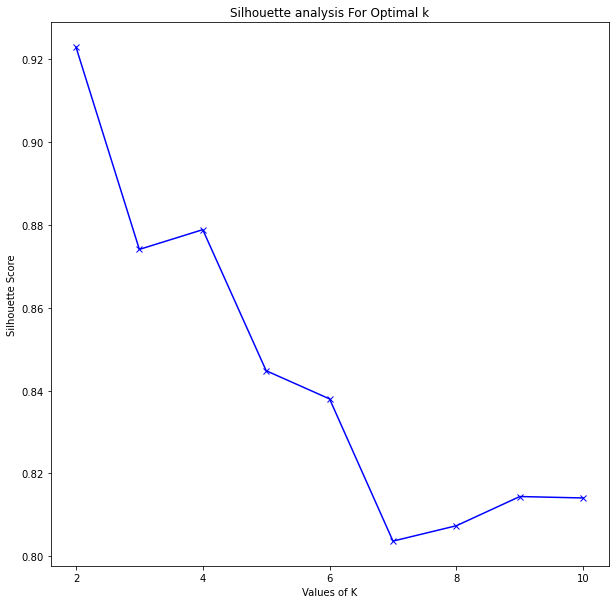

In [187]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_avg = []
kmax = 10
for k in range(2, kmax+1):
    # initialise kmeans
    kmeans = KMeans(n_clusters=k, random_state = rng)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)   
plt.plot(list(range(2, kmax+1)),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.xticks(range(2, kmax+1, 2))
plt.title('Silhouette analysis For Optimal k')
plt.show()

#### Elbow Method

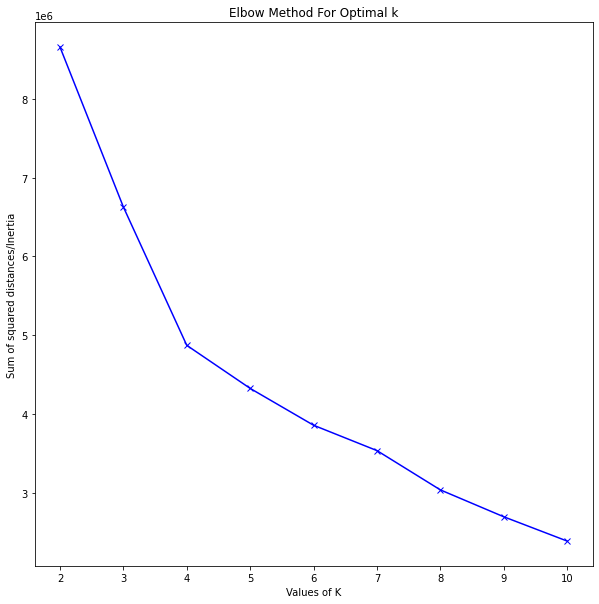

In [188]:
Sum_of_squared_distances = []
K = range(2,11)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.xticks(range(2, 11, 1))
plt.title('Elbow Method For Optimal k')
plt.show()

In [189]:
clustering = KMeans(n_clusters=4, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
ml_df['cluster_labels'] = labels

In [190]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
0      1.32               0.0               0.0               0.0   
1      1.33               0.0               0.0               0.0   
2      1.34               0.0               0.0               0.0   
3      1.35               0.0               0.0               0.0   
4      1.36               0.0               0.0               0.0   
..      ...               ...               ...               ...   
194    7.50                 0                 0                 0   
195    7.51                 0                 0                 0   
196    7.52                 0                 0                 0   
197    7.53               0.0               0.0               0.0   
198    7.54               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
194                 0                 0  ...                 0   
195                 0                 0  ...                 0   
196                 0                 0  ...                 0   
197               0.0               0.0  ...               0.0   
198               0.0               0.0  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 NaN               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..        


Cluster 1


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
64    3.29         -6.744811          -8.58787               0.0   

   7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
64               0.0               0.0               0.0               0.0   

   7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
64               0.0               0.0  ...               0.0   

   4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
64               0.0               0.0               0.0              -0.4   

   4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
64               0.0               0.0              -0.6              -0.7   

   cluster_labels  
64              1  

[1 rows x 366 columns]


Cluster 2


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
113    4.61               0.0               0.0               0.0   
118    5.39               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
113               0.0              -0.1  ...               0.0   
118               0.0              -0.1  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               1.0               0.0               0.0   

    cluster_labels  
113              2  
118              2  

[2 rows x 366 columns]


Cluster 3


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
176    7.32               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
176               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
176               0.0               0.0  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
176               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
176               0.0               0.0               0.0               0.0   

    cluster_labels  
176              3  

[1 rows x 366 columns]

In [192]:
from sklearn.manifold import TSNE

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotX = X.copy()

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# TSNE import
from sklearn.manifold import TSNE

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
uniq_clusters = ml_df['cluster_labels'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

In [193]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### Agglomerative Clustering

In [196]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X)
ml_df['cluster_labels'] = labels

In [197]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
0      1.32               0.0               0.0               0.0   
1      1.33               0.0               0.0               0.0   
2      1.34               0.0               0.0               0.0   
3      1.35               0.0               0.0               0.0   
4      1.36               0.0               0.0               0.0   
..      ...               ...               ...               ...   
194    7.50                 0                 0                 0   
195    7.51                 0                 0                 0   
196    7.52                 0                 0                 0   
197    7.53               0.0               0.0               0.0   
198    7.54               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
0                 0.0               0.0  ...               0.0   
1                 0.0               0.0  ...               0.0   
2                 0.0               0.0  ...               0.0   
3                 0.0               0.0  ...               0.0   
4                 0.0               0.0  ...               0.0   
..                ...               ...  ...               ...   
194                 0                 0  ...                 0   
195                 0                 0  ...                 0   
196                 0                 0  ...                 0   
197               0.0               0.0  ...               0.0   
198               0.0               0.0  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
194                 0                 0                 0                 0   
195                 0                 0                 0                 0   
196                 0                 0                 0                 0   
197               0.0               0.0               0.0               0.0   
198               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
0                 0.0               0.0               0.0               0.0   
1                 NaN               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..        


Cluster 1


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
176    7.32               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
176               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
176               0.0               0.0  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
176               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
176               0.0               0.0               0.0               0.0   

    cluster_labels  
176              1  

[1 rows x 366 columns]


Cluster 2


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
113    4.61               0.0               0.0               0.0   
118    5.39               0.0               0.0               0.0   

    7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               0.0               0.0               0.0   

    7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
113               0.0              -0.1  ...               0.0   
118               0.0              -0.1  ...               0.0   

    4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               0.0               0.0               0.0   

    4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
113               0.0               0.0               0.0               0.0   
118               0.0               1.0               0.0               0.0   

    cluster_labels  
113              2  
118              2  

[2 rows x 366 columns]


Cluster 3


residue 7EW2_intenergysum 7EW3_intenergysum 7EW4_intenergysum  \
64    3.29         -6.744811          -8.58787               0.0   

   7EW1_intenergysum 7LD4_intenergysum 7LD3_intenergysum 7RM5_intenergysum  \
64               0.0               0.0               0.0               0.0   

   7M8W_intenergysum 7DB6_intenergysum  ... 5T04_intenergysum  \
64               0.0               0.0  ...               0.0   

   4XEE_intenergysum 4XES_intenergysum 4GRV_intenergysum 5C1M_intenergysum  \
64               0.0               0.0               0.0              -0.4   

   4EJ4_intenergysum 4DKL_intenergysum 6Z10_intenergysum 6RNK_intenergysum  \
64               0.0               0.0              -0.6              -0.7   

   cluster_labels  
64              3  

[1 rows x 366 columns]

In [198]:
from sklearn.manifold import TSNE

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotX = X.copy()

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# TSNE import
from sklearn.manifold import TSNE

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
uniq_clusters = ml_df['cluster_labels'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

traces = []

for cluster in uniqs:
    cluster_data = plotX[plotX['clusters'] == cluster]

    #trace1 is for 'Cluster 0'
    trace = go.Scatter(
                        x = cluster_data["PC1_2d"],
                        y = cluster_data["PC2_2d"],
                        mode = "markers",
                        name = "Cluster " + str(cluster),
                        marker = dict(size = 10, line=dict(width=1,color='Black')),
                        text = None)

    traces.append(trace)



layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = traces, layout = layout)

iplot(fig)

In [62]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

# CLUSTERING BY STRUCTURE

In [122]:
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')
df.drop('index', axis = 1, inplace=True)
structure_df = df.copy()

In [123]:
structure_df.columns[3:]

Index(['1.21_intenergysum', '1.21_inttype1', '1.21_intenergy1',
       '1.21_inttype2', '1.21_intenergy2', '1.22_intenergysum',
       '1.22_inttype1', '1.22_intenergy1', '1.22_inttype2', '1.22_intenergy2',
       ...
       '7.67_intenergysum', '7.67_inttype1', '7.67_intenergy1',
       '7.67_inttype2', '7.67_intenergy2', '7.68_intenergysum',
       '7.68_inttype1', '7.68_intenergy1', '7.68_inttype2', '7.68_intenergy2'],
      dtype='object', length=1660)

In [124]:
# drop rows for residues not in the list of filtered residues obtained in NaN_zero_interaction_analysis.ipynb
with open('pickles/filtered_residue_list.pkl', "rb") as f:
    filtered_residues = pickle.load(f)

cols_to_drop = []

for col in structure_df.columns[3:]:
    residue = col[:4]
    if residue not in filtered_residues:
        cols_to_drop.append(col)

structure_df.drop(cols_to_drop, axis = 1, inplace = True)
structure_df.reset_index(inplace = True)
structure_df.drop(['index'], axis = 1, inplace = True)

display(structure_df)

PDBID         State    Function  1.32_intenergysum 1.32_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                0.0          None   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                0.0          None   
360  4EJ4      Inactive  Antagonist                0.0          None   
361  4DKL      Inactive  Antagonist                0.0          None   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.32_intenergy1 1.32_inttype2  1.32_intenergy2  1.33_intenergysum  \
0                NaN           NaN              NaN                0.0   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                0.0   
3                NaN           NaN              NaN                NaN   
4                0.0          None              0.0                0.0   
..               ...           ...              ...                ...   
359              0.0          None              0.0                0.0   
360              0.0          None              0.0                0.0   
361              0.0          None              0.0                0.0   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.33_inttype1  ...  7.53_intenergysum 7.53_inttype1  7.53_intenergy1  \
0            None  ...                0.0          None              0.0   
1             NaN  ...                NaN           NaN              NaN   
2            None  ...                0.0          None              0.0   
3             NaN  ...                0.0          None              0.0   
4            None  ...                0.0          None              0.0   
..            ...  ...                ...           ...              ...   
359          None  ...                0.0          None              0.0   
360          None  ...                0.0          None              0.0   
361          None  ...                0.0          None              0.0   
362          None  ...                0.0          None              0.0   
363          None  ...                0.0          None              0.0   

     7.53_inttype2 7.53_intenergy2  7.54_intenergysum 7.54_inttype1  \
0             None             0.0                0.0          None   
1              NaN             NaN                NaN           NaN   
2             None             0.0                0.0          None   
3             None             0.0                0.0          None   
4             None             0.0                0.0          None   
..             ...             ...                ...           ...   
359           None             0.0                0.0          None   
360           None             0.0                0.0          None   
361           None             0.0                0.0          None   
362           None             0.0                0.0          None   
363           None             0.0                0.0          None   

     7.54_intenergy1  7.54_inttype2 7.54_intenergy2  
0                0.0           None             0.0  
1                NaN            NaN             NaN  
2                0.0           None             0.0  
3                0.0           None             0.0  
4                0.0           None             0.0  
..               ...            ...             ...  
359              0.0           None             0.0  
360              0.0           None             0.0 

In [125]:
# drop non-intenergysum columns
for col in structure_df.columns[3:]:
    if 'intenergysum' not in col:
        structure_df.drop(col, axis = 1, inplace = True)

In [126]:
structure_df

PDBID         State    Function  1.32_intenergysum  1.33_intenergysum  \
0    7EW2        Active     Agonist                NaN                0.0   
1    7EW3        Active     Agonist                NaN                NaN   
2    7EW4        Active     Agonist                NaN                0.0   
3    7EW1        Active     Agonist                NaN                NaN   
4    7LD4        Active     Agonist                0.0                0.0   
..    ...           ...         ...                ...                ...   
359  5C1M        Active     Agonist                0.0                0.0   
360  4EJ4      Inactive  Antagonist                0.0                0.0   
361  4DKL      Inactive  Antagonist                0.0                0.0   
362  6Z10  Intermediate  Antagonist                0.0                0.0   
363  6RNK  Intermediate  Antagonist                0.0                0.0   

     1.34_intenergysum  1.35_intenergysum  1.36_intenergysum  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
359                0.0                0.0                0.0   
360                0.0                0.0                0.0   
361                0.0                0.0                0.0   
362                0.0                0.0                0.0   
363                0.0                0.0                0.0   

     1.37_intenergysum  1.38_intenergysum  ...  7.45_intenergysum  \
0                  0.0                0.0  ...                0.0   
1                  0.0                0.0  ...                0.0   
2                  0.0                0.0  ...                0.0   
3                  0.0                0.0  ...                0.0   
4                  0.0                0.0  ...                0.0   
..                 ...                ...  ...                ...   
359                0.0                0.0  ...                0.0   
360                0.0                0.0  ...                0.0   
361                0.0                0.0  ...                0.0   
362                0.0                0.0  ...                0.0   
363                0.0                0.0  ...                0.0   

     7.46_intenergysum  7.47_intenergysum  7.48_intenergysum  \
0                  0.0                0.0                  0   
1                  0.0                0.0                  0   
2                  0.0                0.0                  0   
3                  0.0                0.0                  0   
4                  0.0                0.0                  0   
..                 ...                ...                ...   
359                0.0                0.0                  0   
360                0.0                0.0                  0   
361                0.0                0.0                  0   
362                0.0                0.0                  0   
363                0.0                0.0                  0   

     7.49_intenergysum  7.50_intenergysum  7.51_intenergysum  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
359                  0                  0                  0   
360                  0                  0                  0   
361                  0                  0                  0   
362                  0                  0                  0   
363     

In [127]:
# encode interaction types as integers

# create instance of labelencoder
labelencoder = LabelEncoder()

# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'type' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])


# encode states as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'State' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

# encode functions as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

In [128]:
structure_df.columns

Index(['PDBID', 'State', 'Function', '1.32_intenergysum', '1.33_intenergysum',
       '1.34_intenergysum', '1.35_intenergysum', '1.36_intenergysum',
       '1.37_intenergysum', '1.38_intenergysum',
       ...
       '7.45_intenergysum', '7.46_intenergysum', '7.47_intenergysum',
       '7.48_intenergysum', '7.49_intenergysum', '7.50_intenergysum',
       '7.51_intenergysum', '7.52_intenergysum', '7.53_intenergysum',
       '7.54_intenergysum'],
      dtype='object', length=202)

In [129]:
structure_df

PDBID  State  Function  1.32_intenergysum  1.33_intenergysum  \
0    7EW2      0         0                NaN                0.0   
1    7EW3      0         0                NaN                NaN   
2    7EW4      0         0                NaN                0.0   
3    7EW1      0         0                NaN                NaN   
4    7LD4      0         0                0.0                0.0   
..    ...    ...       ...                ...                ...   
359  5C1M      0         0                0.0                0.0   
360  4EJ4      1         2                0.0                0.0   
361  4DKL      1         2                0.0                0.0   
362  6Z10      2         2                0.0                0.0   
363  6RNK      2         2                0.0                0.0   

     1.34_intenergysum  1.35_intenergysum  1.36_intenergysum  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
359                0.0                0.0                0.0   
360                0.0                0.0                0.0   
361                0.0                0.0                0.0   
362                0.0                0.0                0.0   
363                0.0                0.0                0.0   

     1.37_intenergysum  1.38_intenergysum  ...  7.45_intenergysum  \
0                  0.0                0.0  ...                0.0   
1                  0.0                0.0  ...                0.0   
2                  0.0                0.0  ...                0.0   
3                  0.0                0.0  ...                0.0   
4                  0.0                0.0  ...                0.0   
..                 ...                ...  ...                ...   
359                0.0                0.0  ...                0.0   
360                0.0                0.0  ...                0.0   
361                0.0                0.0  ...                0.0   
362                0.0                0.0  ...                0.0   
363                0.0                0.0  ...                0.0   

     7.46_intenergysum  7.47_intenergysum  7.48_intenergysum  \
0                  0.0                0.0                  0   
1                  0.0                0.0                  0   
2                  0.0                0.0                  0   
3                  0.0                0.0                  0   
4                  0.0                0.0                  0   
..                 ...                ...                ...   
359                0.0                0.0                  0   
360                0.0                0.0                  0   
361                0.0                0.0                  0   
362                0.0                0.0                  0   
363                0.0                0.0                  0   

     7.49_intenergysum  7.50_intenergysum  7.51_intenergysum  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
359                  0                  0                  0   
360                  0                  0                  0   
361                  0                  0                  0   
362                  0                  0                  0   
363                  0                  0                  0   

     7.52_intenergysum  7.53_intenergysum  7.54_int

In [130]:
X = structure_df.drop(['PDBID', 'State', 'Function'], axis = 1)
y = structure_df['PDBID']
display(X)

1.32_intenergysum  1.33_intenergysum  1.34_intenergysum  \
0                  NaN                0.0                0.0   
1                  NaN                NaN                0.0   
2                  NaN                0.0                0.0   
3                  NaN                NaN                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
359                0.0                0.0                0.0   
360                0.0                0.0                0.0   
361                0.0                0.0                0.0   
362                0.0                0.0                0.0   
363                0.0                0.0                0.0   

     1.35_intenergysum  1.36_intenergysum  1.37_intenergysum  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
359                0.0                0.0                0.0   
360                0.0                0.0                0.0   
361                0.0                0.0                0.0   
362                0.0                0.0                0.0   
363                0.0                0.0                0.0   

     1.38_intenergysum  1.39_intenergysum  1.40_intenergysum  \
0                  0.0                0.0                0.0   
1                  0.0                0.0                0.0   
2                  0.0                0.0                0.0   
3                  0.0                0.0                0.0   
4                  0.0                0.0                0.0   
..                 ...                ...                ...   
359                0.0                0.0                0.0   
360                0.0                0.0                0.0   
361                0.0                0.0                0.0   
362                0.0               -5.2                0.0   
363                0.0               -4.6                0.0   

     1.41_intenergysum  ...  7.45_intenergysum  7.46_intenergysum  \
0                  0.0  ...                0.0                0.0   
1                  0.0  ...                0.0                0.0   
2                  0.0  ...                0.0                0.0   
3                  0.0  ...                0.0                0.0   
4                  0.0  ...                0.0                0.0   
..                 ...  ...                ...                ...   
359                0.0  ...                0.0                0.0   
360                0.0  ...                0.0                0.0   
361                0.0  ...                0.0                0.0   
362                0.0  ...                0.0                0.0   
363                0.0  ...                0.0                0.0   

     7.47_intenergysum  7.48_intenergysum  7.49_intenergysum  \
0                  0.0                  0                  0   
1                  0.0                  0                  0   
2                  0.0                  0                  0   
3                  0.0                  0                  0   
4                  0.0                  0                  0   
..                 ...                ...                ...   
359                0.0                  0                  0   
360                0.0                  0                  0   
361                0.0                  0                  0   
362                0.0                  0                  0   
363                0.0                  0                  0   

     7.50_intenergysum  7.51_intenergysum  7.52_intenergysum  \
0                    0              

In [131]:
# get colnames
colnames = list(X.columns)

# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

# #rename columns
X.columns = colnames

# display scaled values
display(X)

1.32_intenergysum  1.33_intenergysum  1.34_intenergysum  \
0                  0.0                0.0          10.785007   
1                  0.0                0.0          10.785007   
2                  0.0                0.0          10.785007   
3                  0.0                0.0          10.785007   
4                  0.0                0.0          10.785007   
..                 ...                ...                ...   
359                0.0                0.0          10.785007   
360                0.0                0.0          10.785007   
361                0.0                0.0          10.785007   
362                0.0                0.0          10.785007   
363                0.0                0.0          10.785007   

     1.35_intenergysum  1.36_intenergysum  1.37_intenergysum  \
0              4.28026          10.454433                0.0   
1              4.28026          10.454433                0.0   
2              4.28026          10.454433                0.0   
3              4.28026          10.454433                0.0   
4              4.28026          10.454433                0.0   
..                 ...                ...                ...   
359            4.28026          10.454433                0.0   
360            4.28026          10.454433                0.0   
361            4.28026          10.454433                0.0   
362            4.28026          10.454433                0.0   
363            4.28026          10.454433                0.0   

     1.38_intenergysum  1.39_intenergysum  1.40_intenergysum  \
0            10.214225           0.426924                0.0   
1            10.214225           0.426924                0.0   
2            10.214225           0.426924                0.0   
3            10.214225           0.426924                0.0   
4            10.214225           0.426924                0.0   
..                 ...                ...                ...   
359          10.214225           0.426924                0.0   
360          10.214225           0.426924                0.0   
361          10.214225           0.426924                0.0   
362          10.214225         -16.875699                0.0   
363          10.214225         -14.879243                0.0   

     1.41_intenergysum  ...  7.45_intenergysum  7.46_intenergysum  \
0                  0.0  ...           0.423877           0.487517   
1                  0.0  ...           0.423877           0.487517   
2                  0.0  ...           0.423877           0.487517   
3                  0.0  ...           0.423877           0.487517   
4                  0.0  ...           0.423877           0.487517   
..                 ...  ...                ...                ...   
359                0.0  ...           0.423877           0.487517   
360                0.0  ...           0.423877           0.487517   
361                0.0  ...           0.423877           0.487517   
362                0.0  ...           0.423877           0.487517   
363                0.0  ...           0.423877           0.487517   

     7.47_intenergysum  7.48_intenergysum  7.49_intenergysum  \
0            10.080035                0.0                0.0   
1            10.080035                0.0                0.0   
2            10.080035                0.0                0.0   
3            10.080035                0.0                0.0   
4            10.080035                0.0                0.0   
..                 ...                ...                ...   
359          10.080035                0.0                0.0   
360          10.080035                0.0                0.0   
361          10.080035                0.0                0.0   
362          10.080035                0.0                0.0   
363          10.080035                0.0                0.0   

     7.50_intenergysum  7.51_intenergysum  7.52_intenergysum  \
0                  0.0              

### Mean Shift Clustering

In [223]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 35


In [224]:
df['cluster_labels'] = labels

In [225]:
# display structures in each cluster
uniq_labels = list(df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(df.loc[df['cluster_labels'] == i])
    print(df.loc[df['cluster_labels'] == i]['State'].value_counts(), '\n')
    print(df.loc[df['cluster_labels'] == i]['Function'].value_counts())


Cluster 0


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                NaN           NaN   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   
361  4DKL      Inactive  Antagonist                NaN           NaN   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
0                NaN           NaN              NaN                NaN   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
4                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   
361              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0             NaN  ...            NaN             NaN            NaN   
1             NaN  ...            NaN             NaN            NaN   
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
4             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
359           NaN  ...            NaN             NaN            NaN   
360           NaN  ...            NaN             NaN            NaN   
361           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
0              NaN              NaN              0  
1              NaN              NaN              0  
2              NaN              NaN              0  
3              NaN              NaN              0  
4              NaN              NaN              0  
..             ...              ...            ...  
359            NaN              NaN              0  
360            NaN              NaN              0  
361            NaN             

Inactive        193
Active          109
Intermediate     22
Other             1
Name: State, dtype: int64 

Antagonist           163
Agonist              132
Inverse agonist       22
Agonist (partial)      8
Name: Function, dtype: int64

Cluster 1


PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
235  4PY0  Intermediate  Agonist (partial)                NaN           NaN   
236  4PXZ  Intermediate            Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
235              NaN           NaN              NaN                NaN   
236              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
235           NaN  ...            NaN             NaN            NaN   
236           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
235              NaN               NaN            NaN             NaN   
236              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
235            NaN              NaN              1  
236            NaN              NaN              1  

[2 rows x 1664 columns]

Intermediate    2
Name: State, dtype: int64 

Agonist (partial)    1
Agonist              1
Name: Function, dtype: int64

Cluster 2


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
158  5ZBQ  Inactive  Antagonist                NaN           NaN   
159  5ZBH  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
158              NaN           NaN              NaN                NaN   
159              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
158           NaN  ...            NaN             NaN            NaN   
159           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
158              NaN               NaN            NaN             NaN   
159              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
158            NaN              NaN              2  
159            NaN              NaN              2  

[2 rows x 1664 columns]

Inactive    2
Name: State, dtype: int64 

Antagonist    2
Name: Function, dtype: int64

Cluster 3


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
137  5YHL  Inactive  Antagonist                NaN           NaN   
138  5YWY  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
137              NaN           NaN              NaN                NaN   
138              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
137           NaN  ...            NaN             NaN            NaN   
138           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
137              NaN               NaN            NaN             NaN   
138              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
137            NaN              NaN              3  
138            NaN              NaN              3  

[2 rows x 1664 columns]

Inactive    2
Name: State, dtype: int64 

Antagonist    2
Name: Function, dtype: int64

Cluster 4


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
64   6LUQ  Inactive  Antagonist                NaN           NaN   
124  6A93  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
64               NaN           NaN              NaN                NaN   
124              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
64            NaN  ...            NaN             NaN            NaN   
124           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
64               NaN               NaN            NaN             NaN   
124              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
64             NaN              NaN              4  
124            NaN              NaN              4  

[2 rows x 1664 columns]

Inactive    2
Name: State, dtype: int64 

Antagonist    2
Name: Function, dtype: int64

Cluster 5


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
10  7C4S    Active     Agonist                NaN           NaN   
34  7DFP  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
10              NaN           NaN              NaN                NaN   
34              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
10           NaN  ...            NaN             NaN            NaN   
34           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
10              NaN               NaN            NaN             NaN   
34              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
10            NaN              NaN              5  
34            NaN              NaN              5  

[2 rows x 1664 columns]

Active      1
Inactive    1
Name: State, dtype: int64 

Agonist       1
Antagonist    1
Name: Function, dtype: int64

Cluster 6


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
8  7DB6  Active  Agonist                NaN           NaN              NaN   

  1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
8           NaN              NaN                NaN           NaN  ...   

   7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
8            NaN             NaN            NaN              NaN   

  7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
8               NaN            NaN             NaN            NaN   

   7.68_intenergy2 cluster_labels  
8              NaN              6  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 7


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
175  5O9H  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
175              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
175           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
175              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
175            NaN              NaN              7  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 8


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
338  2YCX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
338              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
338           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
338              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
338            NaN              NaN              8  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 9


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
216  5DSG  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
216              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
216           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
216              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
216            NaN              NaN              9  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 10


PDBID     State           Function  1.21_intenergysum 1.21_inttype1  \
281  7VOE  Inactive  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
281              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
281           NaN  ...           None             0.0           None   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
281              0.0               0.0           None             0.0   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
281           None              0.0             10  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist (partial)    1
Name: Function, dtype: int64

Cluster 11


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
297  7S8N  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
297           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
297            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
297               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
297              NaN             11  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 12


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
292  7VV0  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
292           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
292            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
292               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
292              NaN             12  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 13


PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
353  6YVR  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
353              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
353           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
353              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
353            NaN              NaN             13  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 14


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
237  4NTJ  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
237              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
237           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
237              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
237            NaN              NaN             14  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 15


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
134  6E59  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
134              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
134           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
134              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
134            NaN              NaN             15  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 16


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
46  7BR3  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
46              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
46           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
46              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
46            NaN              NaN             16  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 17


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
106  6RZ4  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
106              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
106          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
106              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
106            NaN              NaN             17  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 18


PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
300  6ZFZ  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
300              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
300           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
300              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
300            NaN              NaN             18  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 19


PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
108  6K1Q  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
108              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
108           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
108              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
108            NaN              NaN             19  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Inverse agonist    1
Name: Function, dtype: int64

Cluster 20


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
348  5X33  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
348              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
348           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
348              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
348            NaN              NaN             20  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 21


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
192  5TZR  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
192              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
192           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
192              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
192            NaN              NaN             21  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 22


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
234  4PHU  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
234              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
234           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
234              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
234            NaN              NaN             22  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 23


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
200  5UIG  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
200              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
200           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
200              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
200            NaN              NaN             23  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 24


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
288  7VDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
288           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
288            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
288               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
288              NaN             24  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 25


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
314  7P02  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
314           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
314            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
314               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
314              NaN             25  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 26


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
315  7P00  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
315           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
315            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
315               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
315              NaN             26  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 27


PDBID   State    Function  1.21_intenergysum 1.21_inttype1  \
198  5UNF  Active  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
198              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
198           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
198              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
198            NaN              NaN             27  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 28


PDBID   State    Function  1.21_intenergysum 1.21_inttype1  \
197  5UNG  Active  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
197              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
197           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
197              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
197            NaN              NaN             28  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 29


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
66  6LI0  Intermediate  Agonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
66              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
66           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
66              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
66            NaN              NaN             29  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 30


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
242  4LDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
242           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
242            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
242               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
242              NaN             30  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 31


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
136  6M9T  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
136           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
136            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
136               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
136              NaN             31  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 32


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
11  7CX3  Active  Agonist                NaN           NaN              NaN   

   1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
11           NaN              NaN                NaN           NaN  ...   

    7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
11            NaN             NaN            NaN              NaN   

   7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
11               NaN            NaN             NaN            NaN   

    7.68_intenergy2 cluster_labels  
11              NaN             32  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 33


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
130  6GPS  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
130              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
130           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
130              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
130            NaN              NaN             33  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 34


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
131  6GPX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
131              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
131           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
131              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
131            NaN              NaN             34  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64


#### Plotting Heatmap Sorted by Mean Shift Clustering Results

In [226]:
import pickle

# get protein names from pickled file
with open('pickles/protein_names.pkl', "rb") as f:
    protein_names = pickle.load(f)    

# assign variable containing PDB IDs for all structures
PDBids = y

# assign variable with states for all structures
states = df['State']

In [227]:
# generate name/state/function labels
protein_NSF = []
for i in range(len(df)):
    name = protein_names[i]
    state = df.iloc[i, 1]
    function = df.iloc[i, 2]
    NSF = name + ' (' + state + ', ' + function + ')'
    protein_NSF.append(NSF)

In [228]:
# generate name/PDBID labels
protein_NPDB = []
for i in range(len(df)):
    name = protein_names[i]
    PDB = PDBids[i]
    NPDB = name + ' (' + PDB + ')'
    protein_NPDB.append(NPDB)

In [229]:
# determine where to place row lines
uniqs = np.unique(ms.labels_, return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    #print(line_count)
    
print(row_line_markers)

[325, 327, 329, 331, 333, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364]


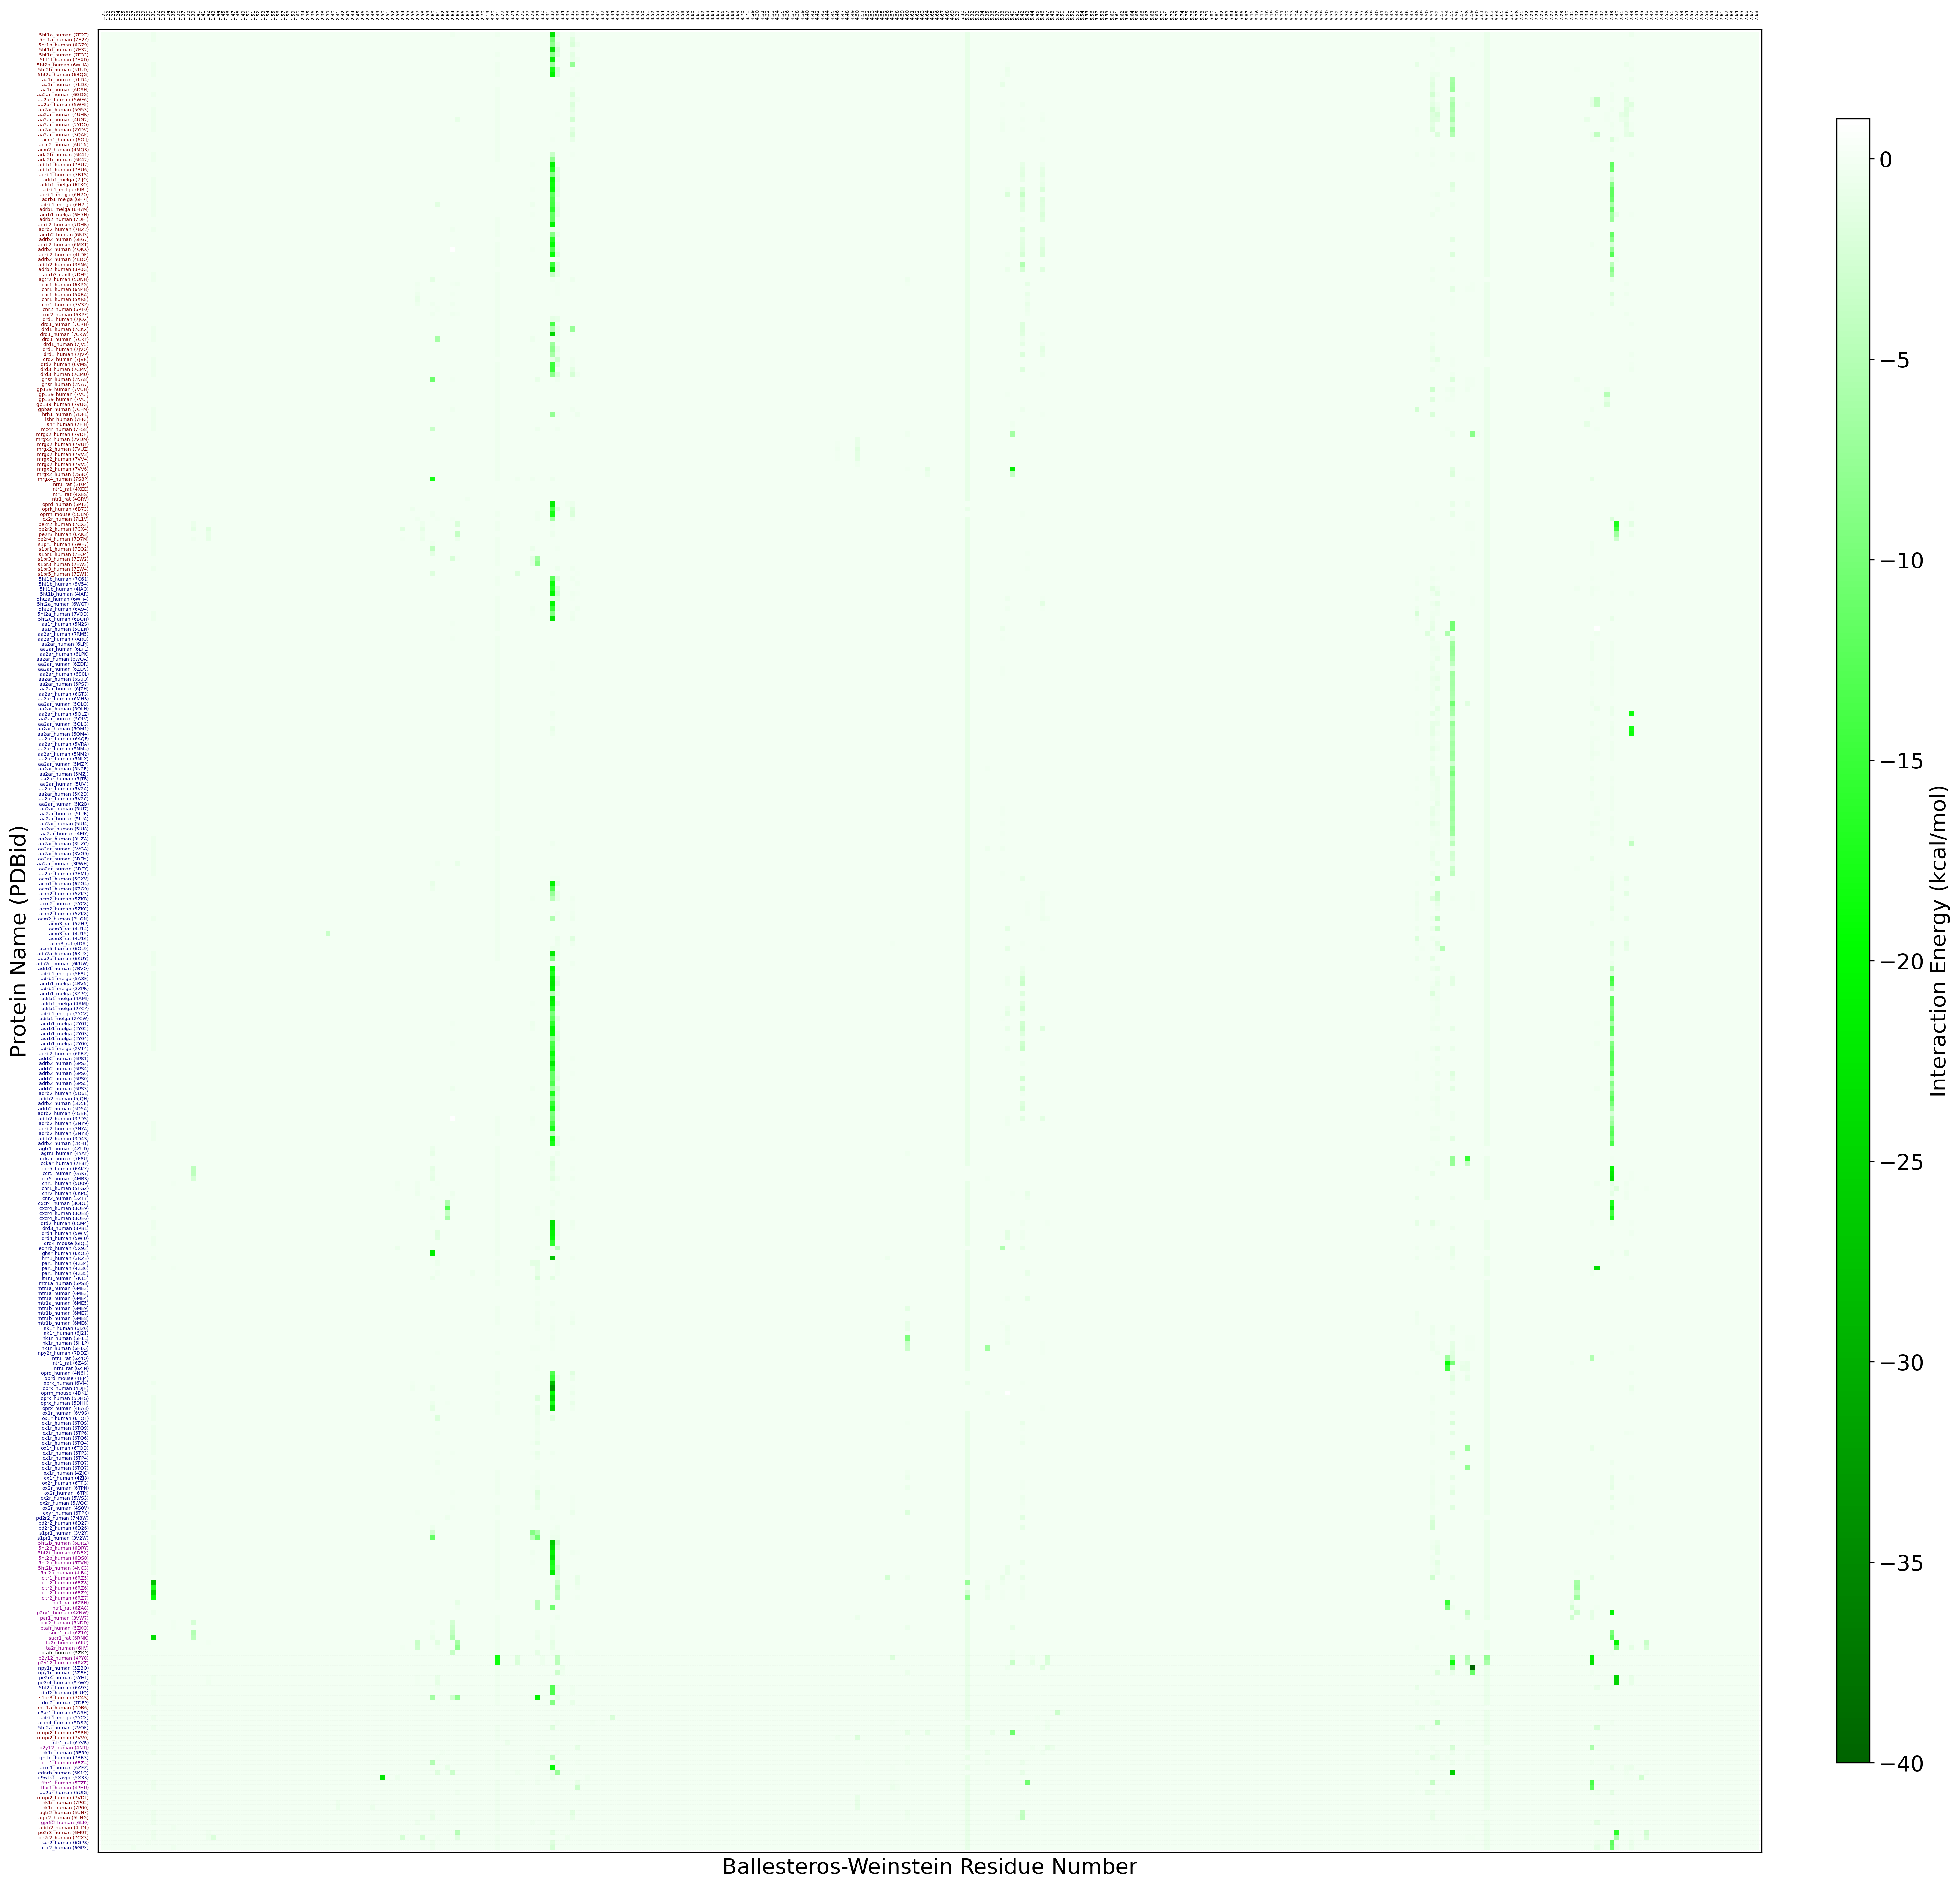

In [230]:
# plot cluster heatmap (all residues)

#imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# copy X to plotX, sort by cluster labels then protein names
plotX = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# drop non-intenergysum columns
for col in plotX.columns:
    if 'intenergysum' not in col:
        plotX.drop(col, axis = 1, inplace = True)
        
my_imputer = SimpleImputer()
plotX = pd.DataFrame(my_imputer.fit_transform(plotX))

        
plotX['PDBID'] = PDBids
plotX['protein_names'] = protein_names
plotX['cluster_labels'] = labels
plotX['protein_NPDB'] = protein_NPDB
plotX['states'] = states
plotX.sort_values(by = ['cluster_labels', 'states', 'protein_names'], ascending = [True, True, True], na_position = 'first', inplace = True)
plotX.reset_index(inplace = True)
plotX.drop(['index'], axis = 1, inplace = True)

X_mat = plotX.drop(['PDBID', 'protein_names', 'cluster_labels', 'protein_NPDB', 'states'], axis = 1)

# convert some variables to numpy arrays for sorting
structure_df_np = structure_df.to_numpy()
X_mat_np = X_mat.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)
protein_names_np = np.array(protein_names)

# normalization and colormap
norm = plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])

# plotting
fig = plt.figure(figsize=(25, 25), dpi = 300)
ax = fig.add_subplot(111)
cax = ax.matshow(X_mat, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = fig.colorbar(cax, fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90, fontsize = 16)
cbar.ax.tick_params(labelsize=16)
plt.yticks(np.arange(len(y)), list(plotX['protein_NPDB']), fontsize = 3.5)
plt.xticks(np.arange(len(X_mat.columns)), resnums, fontsize = 3.5, rotation = 90)
plt.xlim([-1,len(resnums)])
plt.ylim([-1,len(PDBids)])
plt.xlabel("Ballesteros-Weinstein Residue Number", fontsize = 16)
plt.ylabel("Protein Name (PDBid)", fontsize = 16)
plt.gca().invert_yaxis()
#plt.gca().xaxis.set_label_position('top') 


# row lines
for i in row_line_markers:
     plt.axhline(y = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)


# remove tick marks, keep labels        
plt.gca().tick_params(
    axis='both',          # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False) # labels along the bottom edge are off

# color tick labels by activation state
for i in range(len(plotX['states'])):
    #print(i, plotX['PDBID'][i], plotX['states'][i])
    if plotX['states'][i] == 'Active':
        plt.gca().get_yticklabels()[i].set_color("maroon")
    elif plotX['states'][i] == 'Inactive':
        plt.gca().get_yticklabels()[i].set_color("navy")
    elif plotX['states'][i] == 'Intermediate':
        plt.gca().get_yticklabels()[i].set_color("darkmagenta")
    elif plotX['states'][i] == 'Other':
        plt.gca().get_yticklabels()[i].set_color("black")
        
plt.show()

In [231]:
df.drop(['cluster_labels'], axis = 1, inplace = True)

### K-means Clustering

In [232]:
from sklearn.cluster import KMeans
rng = 1

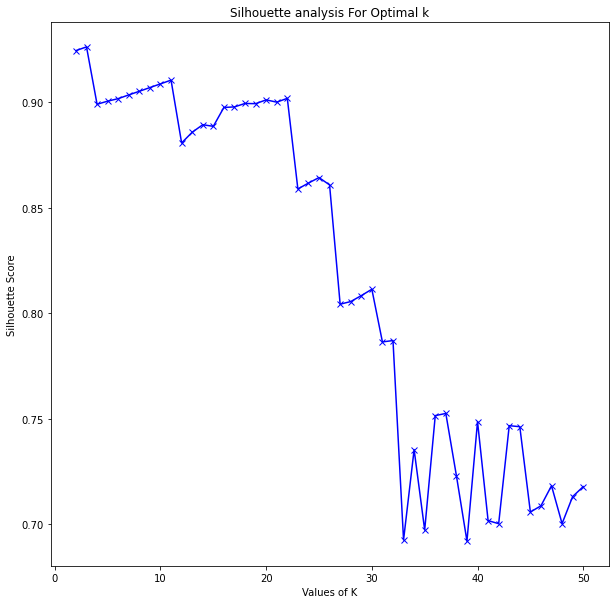

In [233]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
kmax = 50
for k in range(2, kmax+1):
    # initialise kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)   
plt.plot(list(range(2, kmax+1)),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

C:\Users\babow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



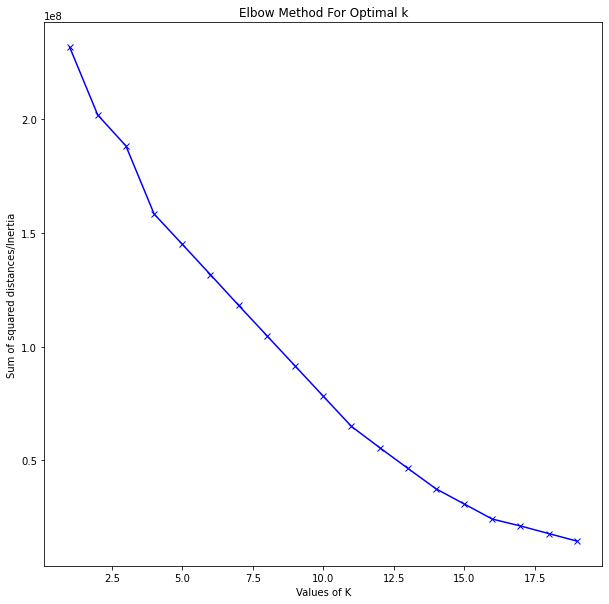

In [235]:
Sum_of_squared_distances = []
K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [236]:
clustering = KMeans(n_clusters=5, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
df['cluster_labels'] = labels

In [238]:
# display structures in each cluster
uniq_labels = list(df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(df.loc[df['cluster_labels'] == i])
    print(df.loc[df['cluster_labels'] == i]['State'].value_counts(), '\n')
    print(df.loc[df['cluster_labels'] == i]['Function'].value_counts())


Cluster 0


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                NaN           NaN   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   
361  4DKL      Inactive  Antagonist                NaN           NaN   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
0                NaN           NaN              NaN                NaN   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
4                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   
361              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0             NaN  ...            NaN             NaN            NaN   
1             NaN  ...            NaN             NaN            NaN   
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
4             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
359           NaN  ...            NaN             NaN            NaN   
360           NaN  ...            NaN             NaN            NaN   
361           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
0              NaN              NaN              0  
1              NaN              NaN              0  
2              NaN              NaN              0  
3              NaN              NaN              0  
4              NaN              NaN              0  
..             ...              ...            ...  
359            NaN              NaN              0  
360            NaN              NaN              0  
361            NaN             

Inactive        210
Active          120
Intermediate     29
Other             1
Name: State, dtype: int64 

Antagonist           181
Agonist              146
Inverse agonist       23
Agonist (partial)     10
Name: Function, dtype: int64

Cluster 1


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
338  2YCX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
338              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
338           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
338              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
338            NaN              NaN              1  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 2


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
175  5O9H  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
175              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
175           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
175              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
175            NaN              NaN              2  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 3


PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
353  6YVR  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
353              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
353           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
353              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
353            NaN              NaN              3  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 4


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
242  4LDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
242           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
242            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
242               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
242              NaN              4  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64


In [239]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)